### 1. 대화내용 불러오기

In [2]:
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import re

In [3]:
with open("data/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)

data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

               Date User            Message
0  2017/01/01 20:32   무지  이거보면 왜 갓창정인지 알게된다
1  2017/01/01 21:40  어피치                창정헌
2  2017/01/01 22:19  어피치   라이언은 내일부터 연구실 출근
3  2017/01/01 22:20   무지          파티 하는거 아님
4  2017/01/01 22:39  프로도                헬파티
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162861 entries, 0 to 162860
Data columns (total 3 columns):
Date       162861 non-null object
User       162861 non-null object
Message    162861 non-null object
dtypes: object(3)
memory usage: 3.7+ MB
None


### 2. 초록 없는 데이터 제거  및 분석시기 설정하기

In [4]:
# 시간정보 열 datetime 정보로 변환
data['Date'] = pd.to_datetime(data['Date'])
# 인덱스 넣기
data = data.set_index('Date')
data.head()

,User,Message
Date,,
2017-01-01 20:32:00,무지,이거보면 왜 갓창정인지 알게된다
2017-01-01 21:40:00,어피치,창정헌
2017-01-01 22:19:00,어피치,라이언은 내일부터 연구실 출근
2017-01-01 22:20:00,무지,파티 하는거 아님
2017-01-01 22:39:00,프로도,헬파티


#### 연도별 대화내용 분리 (DTM 분석을 위해)

In [5]:
year2017 = data['2017-01-01' : '2017-12-31']
year2018 = data['2018-01-01' : '2018-12-31']
year2019 = data['2019-01-01' : '2019-12-31']

In [6]:
# 제대로 분리되었나 확인
print(year2017.head())
print(year2018.head())
print(year2019.head())

                    User            Message
Date                                       
2017-01-01 20:32:00   무지  이거보면 왜 갓창정인지 알게된다
2017-01-01 21:40:00  어피치                창정헌
2017-01-01 22:19:00  어피치   라이언은 내일부터 연구실 출근
2017-01-01 22:20:00   무지          파티 하는거 아님
2017-01-01 22:39:00  프로도                헬파티
                    User             Message
Date                                        
2018-01-01 00:04:00   무지         새해복 마니받으시게나
2018-01-01 00:05:00  어피치        새해복 많이 받으시오들
2018-01-01 00:06:00   튜브                 들어오
2018-01-01 00:07:00   튜브  12시 00에 딱 초코의몽을 삿다
2018-01-01 00:07:00   무지                   곧
                    User    Message
Date                               
2019-01-01 00:02:00  프로도  쉬발럼들 사랑한다
2019-01-01 00:02:00   무지       사랑한다
2019-01-01 00:02:00   무지      내 친구들
2019-01-01 00:02:00   무지        고맙다
2019-01-01 00:02:00   무지  새해도 잘 부탁해


In [7]:
print(year2017.info())
print(year2018.info())
print(year2019.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92998 entries, 2017-01-01 20:32:00 to 2017-12-31 23:41:00
Data columns (total 2 columns):
User       92998 non-null object
Message    92998 non-null object
dtypes: object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52570 entries, 2018-01-01 00:04:00 to 2018-12-31 23:54:00
Data columns (total 2 columns):
User       52570 non-null object
Message    52570 non-null object
dtypes: object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17293 entries, 2019-01-01 00:02:00 to 2019-10-14 19:44:00
Data columns (total 2 columns):
User       17293 non-null object
Message    17293 non-null object
dtypes: object(2)
memory usage: 405.3+ KB
None


##### 시기별로 나눠서 데이터 저장하기

In [8]:
# time_slice별로 데이터 갯수를 저장할 리스트 생성
time_slice = []


slice0 = list(year2017['Message'])
slice1 = list(year2018['Message'])
slice2 = list(year2019['Message'])

# LDA 분석할 때와 비슷하게 모든 분석 대상 텍스트를 담는 리스트 생성
tokenized_data = [msg.split() for msg in (slice0 + slice1 + slice2)]

# 각 slice에 들어 있는 갯수를 원소로 갖는 리스트 생성
time_slice.append(len(slice0))
time_slice.append(len(slice1))
time_slice.append(len(slice2))

In [9]:
print(len(tokenized_data))
print(time_slice)
print(slice0[:5])
print(slice1[:5])
print(slice2[:5])
pprint(tokenized_data[:5])

162861
[92998, 52570, 17293]
['이거보면 왜 갓창정인지 알게된다', '창정헌', '라이언은 내일부터 연구실 출근', '파티 하는거 아님', '헬파티']
['새해복 마니받으시게나', '새해복 많이 받으시오들', '들어오', '12시 00에 딱 초코의몽을 삿다', '곧']
['쉬발럼들 사랑한다', '사랑한다', '내 친구들', '고맙다', '새해도 잘 부탁해']
[['이거보면', '왜', '갓창정인지', '알게된다'],
 ['창정헌'],
 ['라이언은', '내일부터', '연구실', '출근'],
 ['파티', '하는거', '아님'],
 ['헬파티']]


### 3. Dynamic Topic Model 돌리기

In [10]:
from gensim.models import ldaseqmodel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger
from gensim import corpora
from tqdm import tqdm_notebook
from time import time

import os

##### dictionary와 doc2bow 만들기

In [11]:
# Create Dictionary
if not os.path.exists('kakao(DTM)_dict'):
    dictionary = corpora.Dictionary(tokenized_data)
    #dictionary.filter_extremes(no_below=5, no_above=500)  # 이 줄의 코드는 n회 미만 또는 n회 이상을 지울 때 사용
    dictionary.save('kakao(DTM)_dict')
    print(dictionary)
else:
    dictionary = Dictionary.load('kakao(DTM)_dict')

# Term Document Frequency (convert tokenized documents into a Document-Term Matrix)    
if not os.path.exists('kakao(DTM)_corpus'):
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]
    corpora.BleiCorpus.serialize('kakao(DTM)_corpus', corpus)
else:
    corpus = bleicorpus.BleiCorpus('kakao(DTM)_corpus')

In [12]:
# dictionary함수로 만든 사전에 있는 단어들 모두 볼 수 있는 기능
print(dictionary)
for idx in dictionary:
    print(dictionary[idx])

Dictionary(114854 unique tokens: ['갓창정인지', '알게된다', '왜', '이거보면', '창정헌']...)
갓창정인지
알게된다
왜
이거보면
창정헌
내일부터
라이언은
연구실
출근
아님
파티
하는거
헬파티
헬파이어
파이어에그
리마리오
프로도
예스
호우
팟팟헌
리마리오헌
느끼헌
안그래도
오늘힘듬
대단
허리
괘안
이정도는가뿐
즐거운
첫츌근
야옹
돈많이
벌어와유
보고싶다
프로도신
그래도
다행인듯
얼굴봐서
저번에
되었다
만날때가
이제
튜브를
기대하라
다음주
굿굿
2박3일
곤지암으로
담주에
스키타러감
데려가삼
스키담
하앜
라이언
여기
좋음
너의
떠나버린
세컨과
졸업하고
닮은
아이
잇음
목소리도
비슷
심지어
다름
이름이
하지만
연수아냐
신수인씨
신수인
10학번이랑
이름똑같넼
걔는
남자
물론
Ma
굿
금결원
많음
이쁜사람
교육받는중이려나
4명임
여자
몇명
입사
25
1
6분의
간택될수있을것인가
과연
어피치는
되야함
미스코리아는
지노우
없어짐
팬더
무지
팬더버림
변하니
사랑이
어떻게
바람둥이임
나픈아이
저런
벌써
여럿울림
먹튀
당연
그건
기본임
이런마
노답
지하철
퇴근
모습으로
복귀예정
새로운
조만간
모으는줄
발견해서
사려고
엄청난
쿠션을
푼돈
중
최악
2호선
과소평가한듯
그동안
내가
2호선은
그자체임
시간대의
이프로도대마왕
진정한
그정도
되지
기운내삼
출근시간의
지옥그자체지
3개보내고
4번째탐
2명을
보며
힘내삼
끝나
언제
튜브
아심
12일넘어서
1월
만나자고함
데리러가는일은
없길
한강으로
빨리
슬픔
기다리셈
돈이
없음
알바
누가
사갈까봐
조마조마중
진심
백곰카페라도
너무
따뜻하다
복지가
연봉과
머스트
컴
제발가고싶다
담학기뒷통수
rr
고고담
넘는
상상을
초봉이엇움
건설임
라이언의
목표는
왕국
많아야함
여사원이
가야함
그리고
나와
브라질을
없다
포기할수
2월
돈모아서
한번에
건설예정
이주해서
아마존담
초봉얼마임
얼마
예상
넘는다
안했던가
오천좀
그런줄
알앗눈데
더
따뜻햇음
좀
쩌는데
어피치
역시
갓헌
말햇던
면접때
안좋게
알고보니
임원이
서강대
출신

아항
나에게
잠재워줘
프로도타를
닥치라고
할게
없을때
깝쳣구만
많이도
굴에서
왕이엇다
이리가
호랑이
가슴이
아파요
괜찮네
저여자분
이날씨에뛰면
뒤지기딱좋음
쥭을듯
행군하면
가장
추운데
얼어죽는건가
동파헌
엄청
고생이
많네
어피치가
아이온임
예정
유가네
점심에
집임
쉬자
자고
잠도
그치만
위드
훔
같이잇지
아빠
엄마
하고싶은것들
해야지
오후
행군은
그런가보네
출발지
살아돌아와
고생이많구만
가리고
뎅겨
얼굴
솬이는
아이온와라
점심까지
오면
그럼나도감
닥텨
공부해
아직도
저거네
프사
1차끝나고달리게
오버워치연습좀해놔
딕텨
연습할까
연습해놔
내생각에더
도
잘함
롤보다는덜함
빠지긴할텐데
훅
질린다
한달내로
이방
일타다
렙이
백이다
질려서
워낙
익히는데시간오래걸릴수도
임구마가
호구라
두시까지
들어와
삼일전에
어제보니까
했더라
마지막으로
배치돌린다햇자나
이색꺄
내리
막판3판
위도우로
팟지찍고끝냈다
연습하고와라
한조같은놈
라인하르트
넘
딱임
한조가
한조도
멋잇는데
보이는데
프사가
허전해
드림
보자
사진좀
콜렉션있음
쓰셈
원하는거
낰
고구마
뭐냐
임구마임
맨위의거
생각보다
잘생겻네
뭐지
임팩트
그정도는
아니고
재밋구만
건데
셀카
엠디엔피에서
저거
찍엇던
돋네
추억
다운
포켓몬고
일어낫네
라이언군
바쁜하루라
피곤햇겟구만
갓구만
자러
자지
안자지
자지마
말아
보지마
맞군
딴사람
뽀오지이
히앍
야외화장실
누구냐
나다
뀨
색마둘
드셧는가
점심은
2시반에먹을예정
맛잇게
밥도
돌아가며먹어야
제맛
다양하게
달자
강의중
뭘
피방와
없쪄
현금
시간
잇긴잇구만
충전된
개이득
커먼
13분남음
확인한거
피방갓엇으니
시간이
같이만나서
하지뭐
설낳이네
낳
오타
설날
졸귀
갓더
골드찍고싶다
너희와
어울리기
위해
한다만은
약대가서도
잇으니
할수도
연습은
보지
갓헌이
무섭게
추격중
열심히함
은근
근성남
혹우
노력파헌
파헌
아놔
맥은
북미서버밖에
안되네
나랑
롤하고
싶으면
북미서버에서
해야할듯
가능
밤이나
평일
10일날
노트북을
뺄때
신촌방을
가져올건데
연구실에
내뒷자리에
모니터
연결해서
거기를
사용할건데


하이라이트는
매생이국아님
그게뭐임
본인이
올려주셈
못받음
차마
제발
검색하고
올라가면
위로
형
예쁘군
현주방에
아름다움
지릴뻔
업데이트해드림
최신판으로
왁싱좀
담엔
얼굴도
치워주셈
그건좀
만인의
막기위해선
정신적피해를
스티커가
필요함
이것도
쏴주셈
반신욕중이
담에
반신욕하게되면
하나씩
요염하게
샤워하는데
괜춘
이왕이면
시백으로
거울보고
전신샷
화장실
스티커부탁
만화판
지금보고있는데
약간다른게
영화랑
색다른
책도있던데
지르삼
그것까진
명장면은
이영화의
가슴만지는거다
미츠하정도면
최고의순간이지
전우들
고둔박사
가족이랑
말해줘
만나는지만
고든인데
고둔
누군가했네
안만남
모르는구나
끝까지
어케알음
띁임
설명해줌
궁금해서
만나는지가
봐야됨
봐야댐
짘짜로
이제부터임
시작임
이제부터
끝장면을
안봣다면
본게
쏘우1을
본겨
쏘우와
왕좌의게임
인생작들
임튜브의
왕좌의게임은
14편은
본듯
세번
세번보고
시즌14는
5는
시즌
6는
보삼
인생작임
대너리스가
어머니
용의
웨스트로스로
진격함
용엄마
나올떄가
벗고
좋았는데
게임오버
닫음
문
7편에서
거든이
발
지지는거도
부하되서
직소
7폄
가족이랑은
가족은
풰이크임
새드앤딩
고든은
직소는
규칙에
통과한
살려줌
규칙이라
직소의
수술해줌
양반임
걘걍
정신나감
죽여버림
통과해도
2시작
레알
반전잇음
쏘우는
들어잇음
열쇠
3탄까지는
잼게봄
나중도
고문환
빼는사람있음
뭐엿지
첫장면이
그거임
티비켜지고
눈안에
열쇠넣어놨어
데스마스크가
쓰고있는건데
눈알빼서
열쇠찾으면
열수있어
잘해봐
결국
죽음
23모두
사망
눈에대고
면도칼
사망한듯
데스
으아아아아아아
하다가
쏘우2
1도
2도
반전은
기억이안남
반전
중학생때본거라
2005년
작이네
들어야지
들어야됨
쏘우2는
탈출할텐데
경찰이
에릭메튜스씨
경찰
그자가
핵심임
못잘듯
볼
3까진
다시볼까
나지않
하나도
드문드문
여유있는
정주행
다보고
요약좀
고문씬뺴면
압축해볼듯
그게메인인데
요약해드림
보고나서
너무길어서
안읽음
낼까지휴일이니까
디비쳐잘것
호런이
닥헌
닥헌닥헌
닥현
롤이나해
멘탈이
안좋은모양이군
초딩한테
베

주고싶어도
광명임
원한다면
줄수야있꼬
소개시켜줄수있지만
광명
개오바
모를까
수원이면
포천이면
과외해도
서울에서
안할것같고
자체를
포천은…
북부쪽
서울
강북
셔틀버스가
신촌도
영등포구청오면
강북해야지
강북뛰어야지
셔틀애
셔틀말고는
교통수단
가까움
어디가
개멀텐데
태릉
존나끝이넼
7호선
맨끝
교통수단을
잘은
지하철없지않음
버스
온니
산골
강북쪽
과외들어오면
38선
위인가
양구
예전엔
들어오면
그부근임
여자친구
주거나
버렸는데
님드림
혹시나
나줘
지역보고
과외가
마지막임
대학원입학하기전에
정리할거야
7년했으면
많이했다
과외머신임
군대에서도하고
휴학때도하고
두가지의
머신
대학원가서는
안한
삼천원
안타깝게도
불가능하고
연구실컴터는
북미밖에안돼
iMac
이라서
다음주가
지나면
게이밍노트북이
연구실로
오기때문에
노트북으로
그걸로했는데
성능개좋음
160
3년전
가격이지만
존나좋음
자취방에
티비연결해서
쓰고잇엇음
구매해야하나
노트북
사야지
살앗는데
없이도
게임할거아니면
그램
추천한다
가벼운게
컴퓨터는
있어야되잖아
가능할텐데
그램으로
못할걸
오래는
그램은
새로나온
좋아서
될건데
울트라북
가벼우려면
얇고
발열때매
게임은
무거운거
사야겟군
내꺼가
기가바이트
껀데
가볍네
가볍고
고성능이라
배터리가
조루임
들고다니면서
쓰기는
은근불편
닮지
주인좀
정자머신
저사양이라
내장그래픽만으로
충분하긴
할텐데
업데이트
인터페이스
하고나서는
느려지나봄
조금
긱사에서
쓸거면
무겁지만
성능괜찮은걸로
사도좋지만
노트북은
가격대는
50
천차만별
만약에
사고싶으면
개인상담해드림
손진호
계심
사도됨
중고나라에서
소모품이라
전자제품은
아예
안뜯은거
사셈
새걸로
감가상각
매우싼거지
전자제품이
중고가가
애플꺼빼고
애플은
시장형성을
20만
먹으려고
하기때문에
안만들고
오래쓸수있게
잘만들고
안떨어짐
아이폰7
50만원임
아이폰6
중고가
낫겟군
새걸사는게
갤럭시는
갤럭시7
나오고
30이하
갤럭시6
새로운게
팔고
가치가
별로없음
오래되면
쭉쭉떨어짐
내꺼
너꺼는
노답임
공짜폰일듯
팔때
5만원받음
최상급으로
2만원받으면
감사할

깨우지
마셈
재워둠
4시간은
재운듯
옵치하느라
삼연승하고
네시간
재우고
끔
만나야되서
차뇽스한테
심해래
갠톡하라고
나한테
우리한테도
둘에게
사랑좀
러브가이
헠
낭만파임
낭만
닥호
사랑쟁이
손사부
손러브
조는중
배치인뎅
뺌
놀아야하나
딤
01Mar
캐리
1500
차뇽스따라가는건거
내리지고계시는듯
말이
없는거보니
나왓지
한판하고
왓던곳
국
나오게
피가
안경
이미지가
기준으로
맞춰보자
여자니
달라졋어요
유리
시가이로
개좋지
이정도면
버워치
차뇽스랑
클러빙
리장타워가심
잠실인데
센터가
어디지
환승
여기군
귀르가
떠낫는데
22분
다음차가
후임
뒷차가경적을
엠씨더맥스
생각남
핫흐흐톤
하스
4호선은
지옥철인가
접선
정크랫성우
하스스톤방송한다
옥냥이
인가
옥냥스톤
playerscut
대반전
모르겟다
나레이션한분이던데
현대카드
듣는다고
박영선쌤꺼
햇나
현주
아닌거
답좀
듣는다면
부교재
하려햇엄
차피
차뇽이
Need
it
섭은
영선찡
들어본적도
세분
이름이었음
영선찡이
답아닌가
풀어도
915
만점
찍고싶어함
준비하고잇음
떨어짐
아쉽게
편입
3벙
예비
왜본거
피트는
약대합격해서
차뇽아
보내주삼
캡쳐해서
요기까지
잘지내라고
삐짐
안삐짐
버리라고
버리라한적없음
버리고
찬용만
헌팅하러
어케알았지
저말은
한거니까
내잘못은
we
한우리씨가
위
위아더월드할떄
해명좀
사랑한다고해주셈
들으면서
잠드셈
자야함
암유발
그건아님
보통은
도라도에서
다행
찌발림
뚫려서
쉽게
안맞음
네팔이
왕의길
공격도
수비도
잼고
비거점
비거점도
잼긴함
감시기지
네팔
지브롤터
안좋아함
명확
호불호가
이프로도조
아픔
가까이서
만나도
무서룸
썌서
E때매
무섭긴함
무섭
잘터지면
들리는데
소리는
자야겠음
죽엇다고
한조궁
피햇는데
거기로
오더라
잘자시게
호언
요를레이호
힘내
모닝시계
임쭈발은
단톡방
초대
세어보자
여자이름
남초
23명정도
너꺼다
누님
어피치급
아닐까
탑
동안이라
누님들
많이하신다메
신입생되버렷네
졸지에
어린사람이
훨훨
쓸어담아
정크랫정신으로
고양이
외래종이네
남은
배치고사나봐
노약자석에
뇌성마비
지하철에
멋있


잘함스
했을때도
함세
빠대해야지
달리삼
오를듯
하거나
말거나
비슷할걸
준수한
힐러하나
e
로드잘하셨음
넣어도
모스트3안에
그땐
아니엇음
45킬
기억나는게나
솔저한테
써주심
갓
힐러유저인가
원힐
자주해서
늘은듯
골드구간은
원힐인가
역시는역시역시군
2300까지만
잘한듷
저번시즌보다
아직하는중
올려서
행복할듯
근데생각보다
등락폭이오지네
오짐
저분이
연패하니깐
뚝뚝
시작할때는
1958이엇는데
159몇됨
6연패후
2232인가
최고점이
초심자의행운인가
롤도
옵치도
잘봐야하는드
처음에
그르게
1400에서
2200까지옴
괜춘괜춘
합류
승률이
지원가가높네
연습좀해야할듯
돼지다
무난한게
루슈버림
4위
언제해도
플래찍어봐
넘을걸
삼은
오십
야타가좋은둣
루슈가
육십퍼
딜어가
부조화만
잘캐치하면
야타는
오배가
일점
사운드플레이지
신음
흐아아아앙
못하겠는데
피곤해서
꽤됨
딥슬립
옵치안질리냐
할래
6시부터
내자리임
3초면
켤수있음
갑니다
잠시기달
데뷔준비함
선수
오늘까지
세희짱
3개임
목요일까지
안오실수도
있다는
들어서
얘기를
안켤수가없군
여자친구랑
저녁먹으러갈수도
갈아탈까
나에게로
하트뿅
준비해놔
기르모르띠르
왜내가
여자냐
하라면해
스미마센
넣는것만한다
각자
감당해야할몫이지
뭐라하면
발라주면
하루종일
할수도있겠지만
아무도없음
갞루
객꿀
케어좀
느리네
다옴
관람힘
졸업식
들어가까
곧있다
여친과
저녁먹으러감
나눠줄때
안오겟지
졸업장
중요한건
이기는습관
고자만든다
어피치자꾸
팔아재끼면
내아뒤를걸지
못끊는다에
고자헌
탈퇴함
어짜피미국계정이라탈퇴못함
이미시도해봄
너네한테넘기지
2주간
옵치끊으면
임즈가
내목을걸지
못넘긴다에
끊어도
안넘김
새로만들면되지
아뒤야
조밥아
실버나탈출해
겜전에
끌어치기
연습좀
하고드가셈
훈련장에서
스킨있어서
애정이크단말이다
지금내아뒤는
메뉴
제욱
제육보끈
골드다
시메트라는
쌔네
이천뎀
전설뜸
Your
rank
상위
육십프로
하러온대
올듯
삼인큐
올듯커몬
차뇽
그거알아
연승
무승부해도
점수오름
가운입은
졸업식할때
너의마음임
내일옴
9시까지
피피티좀
만들다가
9시에
들어갈게

화이킹
잘안잡힘
큐가
혼자하니
이겨주시오
이겨라튜브
연패중
그만하셈
버틴게
용함
내려옴
그만해요
라이언옴
합류한다
케어점
연승중
막판아쉽게졌지만
재밌었다
권총쎄다
꽃임
딜러의
솔져개꿀
파라하면
딜금이네
적당히해도
소르져르
꿀잼임
접는다메
하고온겨
끊었는데
끊지
호펀아
호펀호펀
옵치해야지
프로환
보니
앨범
우리톡방에
장난
신고수준
아침이라
안잡히는둔
연패네
힘내시게
니맘
과외중임
오늘먹자
할라캤더만
시간되면
내일이냐
두시까지과외라
라는중
저녁에는
우리라도
불태웠다
하얗게
늦퇴
퇴근해도
칼퇴업뮤인데
참을수
2번나오고도
4인궁
분노의
캐리력이
다른분들도
잘한다고함
5060퍼
되엇을때
들가
방벽키고
100퍼
패면
때리다가
압살
구르카
마구마구
휘두름
은영
언제지
중국
디카면
은영이맞음
간지임
저당시
마셧나보군
10년도
여름엠티가서
위에꺼는
찍은거
눈가려져있는애는
수술전이라
원본
잇름
지운거
뼈다귀
저때
무지와
8반이라
안가서
없엄
갓으멈
방이엇음
사건과
필완이
남길수
필완사건
기억안날수도
모를수도
버릭
호텔에
친절하게
용벙이형이
소장함
잡지라하면
일본산
순진한척
오으
용봉타한테
혼낫는제
서랍에
용봉타
게양아치
다녀
창문으로
쩔엇나보네
구매햇을
필완이가
진리의
책이군
지노라인에
반함
뭔가가
잡혀갈뻔
봣으면서
부끄
머름
설명하라
뭔지모름
일본에서
잘못한거
순수했소
그것
저번
학기
갠톡으로만
뿌렷던
받앗소
순수한척
그런줄알고
분들임
일본에선
하눈
고수
님보다
쪼랩이지
찰지게
갓을떼
네오신과
도촬
수사
먹네
집왓군
월욜이
4일
어피치에겐
주중
지옥의
도라도로
떠나볼까
접속함
연구실이라
눈치보다가
시작함
밤엔
안한다더니
넘어야
밤이라는건
에점심먹음
그르쎄에
프리하심스
너학원
언제끝남
저번주로
시마이데스
사드림
역삼오면
주중에
갈비
10뷴이라
뷸가능
와야
구워놓을게
학원시마이함
122시어때
딥토킹
맛난걸로사드릴게
말만해
28일
6월
같이사드림
뭐먹
신촌컴
부탄츄든
어디든
가봅세
옵치좀
접어
골론즈야
아무리
연습해봐야
안하는거고
최소마스터인데
생각해주자
팁을주지
마스터간다
메르시

옵치에
투어를
달려야겠다
달려야디
투어좀
대결
근육키울수
잇겟다
되는것도
마동석같이
얏옹
되어
과외를던져야겠다
들어가려고
쓸수잇는데가
사야되네
어쩔수가
사라니까
뭐살거야
형이
게이밍노트북이요
하나더됨
폭풍
얼마받아
하나당
90임
90오우
그럼3개
500인거
말햇엇나
한시간에
드루와
들어와있음
닥치고들어오샘
피방임
대다
통하시는듯
좋겟다
귀요미들
기요미들이네
돌아가나
오백원인데
오백원임
시켜
준듯
들어오고싶으면
말하셈
내꺼빌려드림
다음시즌도
문제없는건가
언제까지할꺼냐
가야되는데
범계오라해서
하면되지
뭐암튼
놀다오셈
너네는
지금하고있어
언제까지가능
두분다
5시반
밤새도
다시안들어오냐
조루담
달리는중인가
같이와
빠대라
머리부터좀
짜르고
샤기컷
사기컷
컷해드림
드러와
봐주셈
늦을걸
머리자르고
어디로가야하오
개안
밤샘
40분정도소요예정
머리자르는데
1시간달리고
만난후에
다시들어가도됨
안하고있음
방금나옴
데이트하러감
내아이디쓰셈
너네두놈은
아직도하는중
안읽나
하느라
되니깐
노상관
뻣챠
신포우리만두
쪽에서
다시해야지
범계오락실에잇을탱께그리알라
아가리닥치고
강
대강
몇시까지도착하냐
인형뽑기
코노가서
7세
접수함
극혐임
1시간하기
애매한시간이라
8시쯤
들어가는걸로
솬아
알고있어
저녁미리먹어두고
미용실나가면
연락두절이니까
오락실로바로오너라
오락실인지
찍어놔
튀먄
여덜시굳
가능하면
나도감
헤이
들어간다
지쳐감
항게
항게없네
오락실
하나밖에없는걸로
들어갔다가
애들하고
얘기도하고
지치면
보긴
영화관가서
피방영화말하는거냐
돈아깝다
이따들어와
3호점읻
강아
극장임
보고오게쯤
다시나오라구
버스타고
시내구나
상영관들어옴
게임천국임
반대편쪽
엔젤이너스
미스터피자
지하1층이다
봐야겠는데
스터리
액숀과
마무리였다
보시오
시내에서
학교왓는데
후발
슈넬
치즈그라탕
그롸퇑
다신
나가야됨
미안하다고
열공해
사미를절
호허르타는
2차는
언제냐
커몬환
되는건가
안들어가도
안자면
입사햇는데
벌점받나
그러한가
왓긴햇는데
아까전부터
안보임
식당이
먹다가
저것이
편의점임
깜깜해
짬타이거인가
학교내
거룩한
프로도타와

오라고꼬심
우리조로
철학10이심
쫍쫍
핥짝❤
무새들
저번일은
잘처리됨
조져버릴까
조지면
girl임
precious
용서해줌
해결안됨
통제불능임
조죠
그래야델듯
넣어야할듯
압박
서울오면
뭘조져
조져야할듯
누가서울을와
학교다님
공부중이지
누가서울오냐고
하고있어야지
그녀에
대한건
알려드리지
정리가
나쁜짓에
응징뿐
그녀라니
소영이는
말라고함
연락하지
올때까지
이번주말에
일인지는
올라오겠내
5월
데리고오라고
부탁좀
뭔일인지좀
못나가니깐
휴가
외박이라도
이님
못나가요
1차휴가
신병휴가있잖슴
생기고
소대장님
신병위로휴가
신청하겠습니다
복잡한일
생겨서
나가도
알려주삼
공사만
외대오삼
옮기고
6갸월정도
구해서
짐옮기고
뜯어내야됨
싹
다른집에서삼
힘든데
3층인데
아래로
한달했는데
수도가
개힘들었음
개짜증날듯
나가봐야할듯
힘내셈
개힘들어하심
무지대신
갠톡할까
소영이
못봤나
소영님
나도못봄
우리윤아님은
잘계심
잘지내심
신나심
카카오프렌즈샵가서
사주심
쿠션
여친이군
소영이얘기가아닌가보군
평도임
17일까진
우리집에
심심할때마다
코노부를듯
평도가면
안마의자옴
렌탈함
내가냄
안마받고싶은데
받을곳이없어서
좋으냐
우리집은
한번도써본적은없지만
두피
마시지기
바디프렌드
그거좋음
렌탈이
79000원
렌탈
몇달하면
39개월
자라난데
300만원쯤
렌탈해야지
레벨별로
팬텀
119000
렌탈하는건
안마해주는분을
그것도됨
4만원
안마
풀서비스면
전번좀
찝찝한건
지워야함
안걸림
지워야
SNIS615
어제추천받았는데
딱보면
각나오지않음
품번
안마의자
품번아님
링크를
미리보기와
토렌트
즐감
자막
야동은
자막이지
동기들
동기들이랑
공유
확대
카톡할때도위험해
피씨
나눠야지
피씨카톡은
개인컴에서
몰래하셈
당황햇네
인생하직할뻔함
이새키들
카카오
URL보내면
긁어와서
아스카
키라라
안좋아해
본애
찜한건가
개이쁨데
배가
높은거만
조회수
웰케
추우냐
추우냐1
눈온데
평도다니면
불고기먹고싶당
드셈
컨택할듯
위로좀
샥의
의지
몰아넣은
빅맥과
절정으로
마시오
모함하지
씌우려
하는구려
모르오
사악한
경탁이와
기억한다
조롱한걸
쥰희

산책하고
노래하는게
달리몀서
좋다던데
임즈만
정력의제왕
같네
암기
생각하고
외워야지
슈뷰
암기력높이는법좀
금딸
미생물
외우는중
Staphylococcus
aureus
점막감염
황색포도상구균
공부환
스타퓔로코코스
아우레우스
미국식
로마
황제
수요일
오랄테스트임
오랄임
감기삘인데
환절기감기조심
가긴어딜가
코노안이니까
5분내로뛰어와
출근이야
맞춰야지
또됬다
베드신
청불이라니
럭키프로도임
할때마다
보러가게
혹헉보고
청불이뭐임
그런영화없다는데
청소년관람불가
콩불같은
말하란말이다
영화제목를
프리즌
세워라
임자지
이보지
강력하다
승부다
몸통박치기
박살내러간다
헌자지
팬더두개골로
뭐라는거야미친포유류색키가
지켜줘
헌보지
임닥쳐
죽도
패줄께
잔나
안질리냐
옵치도질리는데
안하는뎅
둘이상
블러프연습좀
같이해야재밋지
13
14랑
발리던
아직도생생
허접이
바쁘냐
학기말까지
개많아
외울거
외우라고
카톡할시간에
어짜피까먹을꺼면서
쳐자고잇냐
엎어
저녁잠
새벽엔
공기좋을텐데
상태가심각하네
송우리는
시골아님
시골이지
근데어쩔
데리고와
손팬더
소른소른패른더
박치기시켜드림
숀팬
시간나면
부족해
언니네
함바그
뭐하게
외대로끌고가서
돈부족
코노도있음
긱사밥
뭐하느라
긱사밥얼만데
꽁짜
꺠짐
삿음
만날
애들이랑
야식시켜먹냐
회비내야되고
야식먹고
데이트비용
피방비
그거하느라
꽤깨지던데
내동생도
월급
콘돔값
썻고
8만
결혼이나해
소영이랑빨리
시러
채워야되는댕
뭔동아리
키우기
안닥치냐
잘하기
임자지같은게
그딴거말고생산적인거
안들엇음
야구는
밴드들엇냐
목욜날
오디션
드럼해라
밴드비얼만데
정하삼
공지
안올라옴
대일밴드
밴드하면
오지게깨질껄
합주실비용
빨리오라고
한시간만하고가게
텐프로나가
과방에서
뭐라는거야
가도됨
찌찌헌
팬더가죽
없당
벗기기전에
벗겨
임수헌
외워야되는데
하기싫다
미생환
장그래
임그래
헌그래
빨리오라니까
안가임마
노래부르다배팅하다
오지게반복중
구라가안통하네
배팅의신
운동동아리나들어
임그래씨
에그타트르
공부못함
밴드들면
aoa
콘서트가
쩔었다는데
5개
들엇는데
치킨뼈씹어먹게생겨가지고
오늘먹음
배드민턴

자아분열
크기만
오락실로
맻시까지
내일몇시어디
쏘왓
선정좀
8시까지
모텔앞
서커
프로도이뚫고감
어피치의힘을
지노후는
범솅역
2번출구
운동하고온데
끊음
열반의경지
쿠우쿠우임
18900원이더군
쿠우크으
수사어떰
18900
1790
주말니잠수
왤케비싸
둘중에
아무데나
늦게오몀
그거물어봄
상세히
유효할때
왠맘하면
데리고감
사주잖아
사주고
셀프
이소영씨만
애인응
7시넘어서오는각인가
각이다
일찍와
얼마씀
2000원
8번
못뽑음
잘뽑음
2300엔쓴적있음
추천말
메이져
발라드노래
정준일
빡셀듯
어피치한텐
잘하는게
도움많이됨
25곡
부음
름
머리아파
바람기억
내일도해야함
가져가
여부에
제공
프로도탄의
장렬히
전사함
여동생이
같이놀자
다굴
날인가
참교육의
긱사다
보드까페갈꺼냐
몸만와
무거워
대화하자
몸으로
까페에서
블러프조지고싶은데
여기보드까페
정어피치가
등에서
홈플러스
넘어감
쿠우쿠우에
무지헌
루미큐브사오너라
홈플러스가서
심각한데
바람기억조졌더니
목소리가안나옴
수고
무리엿다
있었어야
프로도기억
김세정
강스타일
되야
이정돈
지노스타일
볼사람들은
후회함
동반한다
딸은
후회를
끊었다
후회다
하고있어요
후회
저분쩜
구강구조도
목사망함
스벅에있는다
총엠가는
중생
총엠마
총엠에서
범계로와
공연
되어로
먼지가
도와줘
되어어어어
먼지가아아아아아
가아아아
날아
야아아지우이이이이
겹치면
곡이
못할수도
듀엣곡좀
남남
듀엣
지르는거
뭐잇지
2층이다
곡좀
남남듀엣
밴드곡
남남듀엣곡은
들어본적이없다
밴그
거도
신나는
말하는대로
보이스코리아버전어때
유튜브검색
난이도있음
간지나게불러야함
일단함
듀엣곡은
오디션에서밖에
추출불가
밴드스러운곡이애초에없지
할만하겠냐
가고있다
1시컷되려나
늦을삘
튀어와
배거파
우유한컵먹고
저녁도
굶었어
아침도
나는그래서
핫도그하나먹음
만약에먼저
다모이면
먼저먹어
밀린다
널두고가지
도착하면
스벅으로오셈
강운동하고있어서
어디있을데도없을걸
스벅임
1대1하고
호허니랑
왕궁예식장앞에서
평촌가는버스
두개밖에없음
집이라
쿠우로
대기임
여기맞음
이번출구로
내려갈게
나여기나가면
와이파이절단임
로

약대갔는데
동아리함
춤추는
약대에도
들어갓는데
춤동아리
애들이자꾸깝침
동기중에
여자애가
맡앟는데
팀장을
올리랴고
스쿨다님
허접임
친구중에
의미하는거지
잇다고
쩌는애
너임
그러니깐
한번가야겠네
싶대
찾아가겠음
교육시켜주면
여친몰래
고맙겟대
정말로
칼빵당함
걸려
오기
연습실
영상찍는거야
개쉽지만
되지않음
아무런
안무좀
짜달라고
어떤안무를
원하는가
기본적인것들로
안무짜서
하라고
협박함
기
어딨음
목아파
미세먼지탓인가보오
인후염이라는데
꾀꼬리
목소리됨
암스트롱
당분간
캐걸쭉
이런목소리도
느낌남
임재범
훠우
손효신
후우
워우우
해보게뜸
별로안좋아해서
이거는
뭐라해야되지
홀스맛이
신기원이다
구랭
어피치다
한가하다니
보러가셈
지웟음
잘생겼는데
외모원탑
얼굴빨
사진첩
개잘생김
상하심
피부
많이된듯
많이봐서
분비
성호르몬
찔림
치나미의
더해야지
좀잇다가
캐이쁘다
마른게
아쉽긴한데
육덕진
일본인급이라
육덕은
쥴리아
육덕
뚱뚱
즁요
임밸런수
보통이면
위인데
내기준
까지임
리온
얘랑
알고잇는
웃기네
고수임
다아심
아스카는
블로그에서
조사중
성격임
질리는
성격
외모임
추천해줄게
메구리
많던데
메구리껀
몇잋전에
보앗지
주인임
운영자
파일봉에서
유료
가입하고
본인인증하면
500포인트
주고
출첵하면
40
70
1000포인트
채우먄
매일함
출첵
학교다니면서
근성
미타케
스즈
아이카
유메노
av회사
매니저
진출예정
레알임
모르는게
업네
전문가임
이토짱은
성형
이토는
봐야겟다
오랜만레
이뻐서봄
이토치나미
아이카가
아이카씨는
149센치라는데
잇구나
저런사람도
비율
주먹인가보네
C컵
이열
넘크지도
큼
디컵
C컵아님
c이상
야동볼땐
눈팅할땐
가슴까지가
얼굴이래
좋아할듯
셀카는
슴가까지
찍어야함
찾아보고오삼
넘큼
자연이라는게
넘크면
혐오
리온도
최고급이지
S급
유메노가
파는
내적갈등한거
파만
박신혜씨
이상형이
얼굴이면
저몸에
워너비인가봄
몸엔
저얼굴이
제격
sg워너비
슴가워너비
27
김무지
훠우우우우
우우우
워우워예
호우우우우우우
임무지키즈
이프로도이네
눈알굴리느라
평도에서
아프다고
찡찡댐
공무원준비

바닐라맛잇음
살찜
가니깐
댐
살찔래
송우리보단
워웅
멀티가능
몇과목듣냐
뭔멀티
스타하고싶네
스타인정
리마스터됨
세과목
9학점
24학점
cancer
중간언제끝남
몇과목
안듣지않냐
4월셋째주가
중간고사기간
시험봄
째주에
몇과목이냐도
뒷목맞고싶냐
쉰과목
웃겨
안보내
안보냐
과목이라자나
개좋아
게이환
친구들아
되것네
만나믄
스벅간다
오자
울학교로
이번주에만나도돼
부담없어
이번주도
1차시험
개부담가지고
학교안가
쉴거
1차셤
포천도
못가여
수욜날
군생활의
남아서
곰팡이나외워
엠티감
지혼자
자아분열온듯
북치고다하네
장구치고
곰팡이된듯
이분열
중이다
뇌가
스펀지가
자가증식하는
잠을
적게자는듯
가줘
싫데
캐멀어
개멈
하고싶으면
오다가
토나올걸
카드들고
게임이있다
공유하는
우리셋이
반걸림
수원다시오냐
너한테맞춰줘
이사해서
날라야하고
이사짐
못놀자나
놀수있는날을
말하라
우리가가는거말고
엠티간다메
답이없는것같은데
못가자나
갈수있음
여기까지와줄수있냐고
안양까지는
6시간임
왕복
얼굴보고
돌아갈듯
보라
쇼부를
팬더나
복귀하면될듯
다시복귀임
좋지나야
건대건대
배우고
건대에서는
한우리도
빡세네
가는차
학교앞까지
하루자고가면안됨
금욜날가
다음날아침에
개빡셀듯
문제는어디서
누구랑자느냐지
어디긴
조루랑같이
잘해줄게임마
방빼가지고
3P
4P
3피야
담당
촬영
4피야
팔아야지
난안팜
난스태프
감독
주연배우
조명
뒤
주연
강간물찍는다
저색기들
어피치드림
드리긴함
그다음은알아서
알아서하셈
책임못짐
ufc가
금욜이면
다다르고있는중
비컵에
시간낼수잇지않나
준비물은
퍼래이드랑
미친놈아
에라이
비누분
손가락콘돔
물티슈아님
저거로도
도움이되지
비누구나
부비부비
슬쩍
쑤우우우우욱
발정낫냐
새벽되더니
이것들이
고개를들면
나온다
알아서해라
윤아랑
잠좀
좀시켜줘
꿈속에서라도
스벅녀랑일단
달려보자
영화받는중
리얼궁금함
외우러감
라이언감면
할일하러
영화한편봐여지
좁밥
장르
다운받냐
뭐하러
공포제외
감동적이고
교훈적인거
19
재밋
퍽펑눈물
엑스맨
보러감
울버린
공조도
날짜따지지말고
정력왕이
8시50분에일어났네
8시45분에


농익음
연상좋아함
연상
안만나봤으면
그건당연
나이불문
한국여자보다는
소원해지는듯
다른나라
고자가될꺼임
말년에
절들어가는게소원
말은
이래도
70살쯤엔
들어가겠지
평온한삶을살고싶다
연상은
였음
긴장빨아
썸은있었음
연상좋아
연애가아님
뽐내
연상앞에서
춤사위를
농염
녹여봐
어리니
유나띠가
누나도
만나봐야
나이폭
만남의기본이지
스님헌은
알수없는
불경외워야지
머리부터
밀어야할듯
삭발
거기털먼저밀고
브라질리언
왁싱
독촉
댕청
브로콜리
샐러리
불경이나
옵마니밥매옴임
궁예헌
관심법의
제왕
뇌터질거같아서
안구정화좀
정은우
니놈스타일
내스타일
깨어납시다
관심법
파고
내스타일아님
찍으면
옴마니무지
눈길로보았을떄
전문가의
옴마니헌
강력핟
붙여도
궁예임
시라소니
압승
인성은
외모와
젠장헌
쉬야헌
빨리쳐자라
좁밥들이
비웃음
한자
미소가
홋헛이에겐
입고가삼
눈빛이
어케됨
녹을수도
여자분
완소남
포켓보이
평도궁예
애꾸
평도밥매옴
엉덩이살저며버린다
신초흔
버스새끼들
조루가오지말라자나
오지말란말
임구마출동해
퍼래이드나연습해
애꾸헌
점심이나
뭔벌써점심이야
멸종시킨다
안그래도살빼느라
한끼채식하니까
살뺴는중
바지
운동을좀하셈
푸르지오
하루몇분하는데
주
얼마하는데
한번가면
여덜시쯤
러닝하고
깔짝하지
접어임마
배구
어피치정도는
비컵이야
가슴빼고
위에좀
일너
제정신아님
조루요즘
뭐이냔아
무릎이
안좋아서
변명일뿐
진심이여
왼쪽무릎에
충돌증후군이
터널증후군까지
약점이한두곳이아닌데
허약함
터널
손목증후군도있는거아님
두곳부터
만져주지
못쓰게만드어드림
고자나되라
스님헌
가위들고감
나도몰라
알면이러고있겠내
여행이라도
연휴에
가면뭐해
광란의
유도
노하우로
고민인가보군
장난이아닌듯
두번째는
안해주는거지
결판을
내야할듯
결정은
빠를수록
신촌가야되나
케어해주러
말구
내용을
미안하군
심각햇다면
안심각함
쟤가이상한거임
고민아님
조져도되겠군
순수하지
이방에서
방송
튜브연습
잘하는중
바쁜듯
밤새야함
밤샘환
올나잇스터디플레이
도서관에
약대생밖에
졸리면
올나잇플레이
집에왓다
밤샘에는
핫식스가최고댜
헛개수
9시반
미생물학
몬스터
몬스

핏짜인가
조용하고
좋대서
역삼이라
좋다며
케어해줄거
끌고가서
공부하느라
놀고
완력으로
제압하셈
전성기온듯
이제만남
언제만나
보내버리삼
훌리오간다
강남역에서
만나자고
멀다메
우짤라고
라이언에서
실시간
서비스면
시작해야지
모범환
시험준비햐야지
유기화학
애기프로도
언제까지셤이야
오랄
시험도
코
양동근은
본것같은데
보내준
분중
한명인데
친규
누구지
수종이
간뷴
에스피떼
임희정
임희정이랑
개여신임
희정이는
남의
동기들임
노리셈
안느껴짐
끊으삼
유메노아이카
보일거임
허지웅환
뽑아서
줄은듯
흡
잊은거
첫사랑급
좋아하기가
상처받을거같음
개무섭
시대의
감성가이
덜됫음
아이카만이
성욕이고
성욕은
풀임
뿌리고
싶지
1위
몸매로
평가받던데
보긴했는데
보내줫자너
비율이
키
G였나
great의
g인듯
Giant의
G임
희정씨
희정이
노답이라
관상용임
여친이면
남으려고
친구로
하이스펙이라
외길인생아님
존나부자여야함
진작에
가동중
멀티코어
멀티코어는
귀찮음이제
조져야지
개친한거
희정씨랑
하나잡으면
개친하지
느끼고있음
갈아탈
나면
조질생각은있지
몸매보고
몸매라기보다
사람이랑
활동적인
트레이너
굵음
허벅지
근육이면
윤아띠를
개조하삼
개쩔겠네
80함
개조실패함
사람임
80이라면
들겠내
엄청나겠꾼
안써도됨
다잡고
소개팅이
이천은
포천과
커버영역이아님
절대불가
연애임
그가온다
개보고싶네
올려줘
꽂아주고
네오인가
님들도
예약이
셤이나끝내
올라가면뭐해줌
나머지세명은
쫓아내게
자면됨
부하임
내감
내려감
1박2일인가
멘탈케어좀
웰케바스락거려
열거임
다겨
맞아야정신차리나
바스락바스락이좋지
때려보던가
빠따들고감
비치
사랑싸움
bitches
뮤비가
개굴
부담스러움
씨엘같은여자어떰
CL
싸워서
우리랑동갑임
이기면됨
시해
굉장히활동적이지
춤도잘추고
가져가라
인생에불가능은없다
생각도있고
자기미래에
강화이팅
임팩트도
이채린
고르라면
둘중한분을
참고로둘다동갑임
그런거아니라니
그런걸로해
서로알지도못하는데
뜨고싶다
속세나
전재산
주고가
65쥐가
65G
뭔말이야
여자외모에속지말것
65g
라하면
알거라는데
여자라는데
뭐라하네

애흐상
웃겨서안됨
영상이안나오고
니욕함
듣는중
들과
가이년이
야메로
안양탑
이거시
담에는
공연하는걸로
부르는데
정직하게
넘겨봐바
생각이나도
룸메랑같이듣는중에서
그컨디션이아미
어제같은
제대로부른다
출동한다고
미워요
불러줘
정인
영상인데
이것좀
존서
뭐였지
미워요가
후렴구
웃으라하지마라요
이거나
서울올라감
목준비해놔두놈다
멋있는듯
성악이
무시
노의미다
가수일뿐
안양탑도
웬성악
잘부르는듯
아사미도
윈도우10
쉬발러미
씹네
포맷함
포맷해도
포트
떄린듯
부셔버리기
일보직전
만든거임
부산행
부산하앙
321
경쟁률이
하고끝
똑같은거
몇번을
보라구
안보니깐
봤지
그거썻냐
편집프로그램
베가스인가
빨리자
임선생
임무당
눈빛은
언제봐도
질리지
공유기로
사은품
잇던
해결했다
때문인듯
호밯
호빵
갈거야
응가하러
삼분
날위한
밴드부인데
자작곡
데뷔곡
넘기네
라임
맞추려다가
지루됨
지노됨
잣다
프로도이됨
햇네
만즘
여가부에서
공신력
청량리는
아사미
아사미는
은퇴했다던데
자궁적출하고
은퇴함
못되는건가
자궁적출을
암걸려서
떠났구만
레전드가
솬에겐
진호에겐
프로도타에겐
유이
더워부러
더움
반바지
입은게
한수엿다
이번여름도
빈사상태로돌아다녔는데
삼십곡쨰
230곡째임
성대결절
내려주신
성대라
신이
평도주말은진짜아니다
호모헌
어디공부할데없음
너네아파트독서실얼마야
칸막이
요즘셤기간이라
거기도북적거림
독서실있음
인기좋은
육처넌
동사무소공부방일욜에안엶
대폭발
피시방이라
안염
너네공부방어디냐
달안동사무소
넘멀다
10분거리
교실
독서실이확실히꿀임
용봉이처럼
창문
독서실이
시원함
경비한테걸리면
중학교들어갓다가
화이트데이찍는거임
경비
꿀빰
까페로
피신해야하나
메머드빨아야겟네
평도에도많음
많아지는듯
미인의수도
표본수가많아지니
더우니까
미쳐간다
진짜헬조선될듯
한번해
젠틀함
같대
보여줬더니
젠틀할거
어떤사진
보다니
젠틀함을
안보여쥼
보여줫으면
넘어옴
저거보면
솬급
메머드까페옴
매머드
32온즈
무려
밤샐듯
내일뭐있냐
내일뭐잇냐니
윤아관리나좀
관리는
많이마신듯한데
반에반도못마심
관리나좀
2차소개팅언제임
언제야
두번만에

40번함
구라
받으면됨
정력싸움
Dak
HH
잘지내냐
갔네
바람처럼
사라진
튜브이여
포동
포동한
관리하는
청결한데
화장실은
찌린네
지린듯
솬이급인데
묵읏나
23세네
신체연령
18세
미성년자헌
원조헌
엉덩이헌
무한한별명이네
헌헌
부탁함스
좋아요를
페이스북에
현쥬르의
가보시면
에잇
배틀현쥬르임
야마토프로도
스피드담
더해주삼
맘인듯
전쟁
치를
회사가서
일찍갈듯
지하철과속해서
2호선이
초보운전인듯
치한
근육으로
변태가
예쁜이
내리면서
솬일수도
치환
나선환
홍보좀
절실스
댓글달아서
일빠로
얘기해줌
인맥으로
만들어드려야됨
페북스타
유니브에
올라와서
페북스타임
유니브가
망해버려라
서강유니브
공식
페이스북그룹
제자이
링크나걸어봐
뭔디
배달한거
훔쳐감
가게가망해야되
가게가피해자아님
나페북안해서
링크점부탁
도둑좀
잡아주
신상털면
얼마든지
도둑
링크걸업하
똑바로
언어장애헌
장애우
페북안함
삼년째
해킹당한지가
페북재밌어
아무도안해
멕시코에서
시도중인듯
저거면
튜브어디야
급행탄듯
복면가왕에서
사랑아
소향이
임솬
찌바르는듯
복귀좀
은퇴하고
현쥬르글
끌어다
달래
삼백명만
알아서하라그랰
소향
개미침
페북연예인의
홍보해
현주가
언론인이잖아
알아서잘함
육백명은
채워야할듯
2년다되가네
페북안한지
눌러줘
좋아요좀
10키로다
링크나걸라고
뭐들어가야
하던말던할거아녀
링크좀
줘봐
열량
뛰어도
저정도면충분함
빠지지
살은
안먹어야
살빼기
행복다이어트
자주가는거
채울듯
12번에
무료해주더라
2주에
일욜빼고
주6일이니
마헌
머신헌
올나잇헌
골아떨어짐
4번씩하는
능력임
뛰는듯
간당간당하다
지각은싫은데
런담
얌얌
들아닥쳐
시간가성비는
웨이트보단
1시간에
800가까이니까
와리가리걸은거까지합하면
스내치가
몰게뜸
소모량을
웨이트는
칼로리
제자
런헌
800칼로리
몇분컷가능
스내치로
무게에
나을읏
러닝이
우사인
밤의황제
셤막바지라
카톡도안보네
혼내고와
유교과
너무누적됫자
하체피로가
당연한거
운동하고나면
현타가온다
너무오래간다
할것이지
듣고결정
하니네
이여자
솔라
쏠라임
딱봐도솔라네
솔라가누고
마마무
마마무에
저런면이
누

지금시간엔
자료실
빌리러
점심싸옴
어여가삼
여자구경하지말고
않좋대
실내활동
관심있는
분양
세퍼드
150마넌
50까지
깎아준다
분양비인데
명품이란다
서류로
혈통서도
멍멍이
옹옹
마당이
있어야한다는디
마미견이
분양중
새끼를
애기들이라
할수없이
마당이라
재력
갑자기웬멍멍이냐
셰퍼드헌
진돗개만
취급한다
진돗개
졸귀네
치유된다
진돗개백구
원하는
이리온
황구도
학운공원
봄이다
집가서한숨
자지는
오지말래
모텔가네
갓헌한테
여자후리는거좀
스킬임
눈높이
후림
범계의
효도르
범계의난봉꾼
뒤에서만
아이스크림
평도왓다
대기실에
이쁜이
녹눈다
뷰라보
이쁜이래
지금봄
뭔아수쿠림이야
뿌리삼
녹아서
아이스크림이
흰색
그녀들에게
촤아악
이상하게사람많아서
진작에옮김
저녁에다시입성예정
신호등치킨시켜드삼
맘모스카페
아이스초코
제티맛나고
초코가루양도
딤채
도축
셤끝
출발햐
수고햇솬
피곤해서내리잘듯
소개팅연습이나좀
골인인가
강케어좀
똥차
또치
똥침
호펀이
공부한다
딱들어맞네
타이밍보소
딱들어맞는다고
갓갓창민
최강창솬
무대가보고싶구만
마지막이
일분
기계가
노래라고
낼모래오는거맞어
진짜안옴
6인팟가는거아녔음
과천에있지않음
롱쏭이
먼솔
취소됨
온다자나
팽더쉐꺄
휴일임
수욜에가능
캐리해줄분
놀만치만
교통비빼고
코노비
낼수있다
코노정도는
갓호랑
갖고있어서
넓은까페에서
디빌수있음
쇼부봐야함
매번
멀리있는애들
뭐해서
부르기도
화곡이다
어디서보고싶은데
위쪽이면
노원
위면
화곡이위쪽임
통일전망대
통일시키러
개성공단에서
정은이목만따면됨
범계가도됨
목이안보이기도함
1인분은
가눙
범계오시면
화곡밥
아니근데
바로오는겨
안들림
집도
휴일인데
수요일에
데이트하는데
저빼고노셈
6인팟은
무리인가
어흑
굿밤보내시길
권태기온지얼마나된거냐
담태기
데이트는
권태기
말로만
역시그런건가
츤담
그럼어카지
롱쏭이랑
어피치얘기들어보고결정하지
갈테니
너네가까운데로
쇼부보도록
귀한기회러
어쩔수없다
미안하다제군
이해해주지
돈독한
이되는건가
밀당고수네
출근잘하고오너라
비하니
이군
그러할듯
오늘평도도
지른거엿어
휴가를
평안하다
400이네
5월은
상여금이

호호호
강침착해
내일휴일이야
낫닝겐아
이미먹엇지
간단히때우고
운동이나가삼
잠이나쳐자
하셧나용
사전투르표
장염걸림
새벽내내
폭풍설사함
밤사이에
다이어트다
먹엉
같어
큐슈가
후쿠오카여
거상을
해봤다면
쿠슈
후쿠오카
거상임
몇이야
전투력
3만
공장도
속초에
봉봉과
출신이야
해태서버
행수
도쿠가와
있었습니다
몇개안되는
조선에
사환이었습니다
고급파초선찍어내던
공장이어써
대방이었나요
홋헛씨는
차우차우
낡은조총
학살해야뎀
거상
홋헛신이랑
환쏘발씨
2차장수나오고
홋헛신
속초까지
점령
공부할장소찾아
대단한남자
헤매이는중
쯤임
꼬박꼬박쉬어대네
양아치임
다쉬고
쉴때도
금요일엔또쉬겟지
개년들
빡치네
공무원들
인력남아돌때
공부장소추천점
옆자리
너일로좀와바
아크로타워에
또까페가야되네
하자너
아크로타워여
가여
한군데
어피치신이
지노대신
미쳣음
공휴일임
사줘임마
짱깨나
로운순대국
중궈런도
주결경
이런중국인은
환영이지
시진핑은
너한테어울림
무솽솽
보호지정동물아니냐
비벼봐
시진핑한테
팬더웅담
없어요
그거취하면
시진핑이잡으러놈
반달가슴곰
웅담은
지리산
저녁으로먹을껴
점심으로먹을껴
점심이지
정해지면
허접하네
에일리언으로
코노나조금
범계근처에서함
정지해서
와이파이존에서
날씨엔
짬뽕이나
가서연락드림
줘루는
이런날엔
짬뽕인데
삼선짬뽕
까페임
농구코트옆
Cafe
amorino임
걍기다릴테니
암때나오삼
할일다하고
하고싶은
사귀지
않앗니
보살
선생
뒤질거같음
치질오는거
몇번째야
오전에만
샐러리섭취
소환조사를
마셔도
물만
포퓽설사네
가오갤
그루트
아엠
가오갤2
초코초코
츄붑
츄룹
츕츕
으읍
으흐읏
네오이도온댜
네오만나면
전화햇어
알려쥬면
카페왓슴
사이좋게
병원가야지
함께할게
나갈수가
똥쟁이라
가면되
아모리노로
농구장
있엉
카페에
농구장인데
아모리노가
거기잇어
아크로타워
잇는데임
막는
크림
진호야
데오도란트
롱쏭
잘들어가시게
또언제시간돼
드리쿨로
식사라도
방학하고보겄네
그때봐
쿨한
갓엇엉
로늘
무한배변중
치킨은맛잇엏다
가오갤봄
정신없을듯
가오갤이재밋군
나중에봐야지
쾌차함
노량진으로
회먹으러
노량진
쉽지않음
똥

비밀아지트에서
얘기하기로함
곳잇는데
사람안오는
말하려고
터뜨리고
터트린다니
음란마귀
미친튜브
비밀로
나갈듯
고백햇다
크으으으으으
드디어어어어어
욕하고가자
개새야
결혼까지
좁다며
결혼해
모쏠
밝힘
아름답게
처음이겟굼
무엇이
고백하니
긴장하며
벌개지더군
키스를
빠르다생각함
당황하는
2주만에
2주도
날려댓는데
돌직구
얘기해보니
생각하더라
세상인데
달달터짐
당황햇대
하트옴
아잉부끄
안자네
금욜밤
목욜에서
주기적
1일이라니
많군
역사적인
어제군
2일인가
2일이지
진호우는
갔다감
놀라운건
인제대
혼자왔다니
인제대가
진호바라기네
위험한대
돈없
다른곳에서
재울수가
화곡싸잖아
개인정보를
들키고
양심에
찔리는거지
화곡이면
가격이랑
찜질방에서
잘보내줌
홍콩으로
놀아준데
부산오래
여름에
안마의자로
안마르가즘
건들순
새내기를
그럴수있어
소영바라기라
잡혀살아서
바라보고
바라보기는
소영을
다른곳
밑은
치나미로
향함
헤헤헤
1대1이지
빈부즐
젤리빈
온다면야
담에가도
갈라
데이트할때
여친이랑
캐먼데
못돌어가심
너네집에서자야지
짜피주말인데
일산가면딱이네
냘
역삼감
글거
비슷해
화곡이나
암대나
처이스
초이스는
홓
임모띠
주소좀
dambang0323
넣어드림
콜렉션
꺄아아아아
외장
몇편
소장중
이토치나미외
심장과도
소감좀
튜브이를
상관없이
와는
VR
그만해야지
vr이지
하기전까진
오케됨
아무말도
개선의
의지가
뭐하는지도모름
연락이없어
바라는닷
해주길
만나는거임
자제해야겠어
억제하는중
변햇다
생각할거같대
뮤슨
이야기해
개빨리감
몰랐는데
빨리가는둣
뭔얘기함
떠오르는거
이야기하고
성함이
여자친구분
정지은씨임
파릇한녀석들
어케되시닝
김혜원씨
몇살
동갑이얏
지은씨는
94
24
접어야겠다
접는다고
호핫이는
자제할필요없음
실컷해라
하고싶을때
일어나지않을일을
걱정하는것만큼
의미없는건
초기에막
불타올라서
눈치보면서
구석에서
뽀뽀몰래하고
그럴때가
비밀연애가
답답해서
짜증나긴한데
재미도있
첩보활동같잖아
좋은것이
돌이킬수
알려지면
없으니깐
모르는걸
즐기는거지
짜릿스
동기애가
주목
부족한듯
즐기자
행복함을
통화햇다
행

어떨거같음
계약
스마트
하더라고
P2P방식에서
만들어주는게
이더리움이라고
제약조건들을
이더리움으로
할건가봐
자본이
이더리움도
오르긴하더라
300정도
자본
생각이라고
투자할
300이면
하려는듯
27만원인가
이더리움이
생각해본적이없어서
이프로도의
기술만
알고있고
될거라는것만
투자가
뜨러감
나도안다
투자전문가가
오셨꾼
그정도아닌데
너네가더
잘아는듯
다른조발표할때
발굴방식이
수학문제
지급되는거아님
풀때마다
수학문제가
수학문제지
노가다임
가지고있는
구글이
꼬라박아도
못푸는거라
푸는게
mining
pool이
찾는
거기가입해서
노나가지는게
현실적이랴
과제하라고
디져임마
밥셉
불만이야
부하녀석이
밥솁같은놈
홋헛이부하임
다른게
일어난거임
깨어있었는데
진작부터
새삼스럽게
딱딱
무룩
흥분기가
딱딱핳핳축축무룩
5단계임
나누면
딱딱핳핳푹푹떡떡축축무룩
못보내다니
부산까지
디테일하네
페북하면
꾸르팁
조용해
끝판왕
사기인
삼성역임
집근처다
둘이저녁먹고
포천으로가보셈
정자역임
홋헛오늘
혼자연습해야함
연습하고가라
역삼아니지
흔히있는일이지
범계로가셈
올거임
몸컨디션이
헌터
생일파티노래불러주삼
몸이나
추스려
가아아아아앙
우야
10만
땡겨주실수
잇습니까
은행핳
데이트가야함
일주일만
쏴줄게
일주일뒤에
어디갈꺼임
이태르원
노노놉
경제력
안남앗다
거림
허덕
국가의
놀라게될날이
잔인함에
맥여서
살찌워야
마르심
범계플레이임
일오일
적당함
좋아하므로
찌우는걸
가는거이
먹을거는
얘기하기로
전화하면서
걔들
거의양식
추천해준데는
집이래
얘기해보기로
얘기는
그랫고
2시까지
7시부터
122시
오랫음
멀어지지만
자상하네
거북이
손이나
팔짱은
않아도
조급해
멋있군
거니깐
걸어준것만으로도
그녀니깐
한것도
그런거니깐
쑥스러워서
로멘틱임즈
개못생겻네
갓세정나옴
로맨틱임즈
취소
개야만
상큼
응큼
쎄다
이겻다
오랜만이네
새끼랑
절교한
사진찍엇메
너만편집함
형이라
살짝민욱이닮은듯
뵹쉬는
봉슈르
어머님께
전화드려야지
큣세정
꿈의
워우
이상형이다
요런분소개점
성격이
얼굴보다
큐트의
가슴에이컵
등신
말벅지
좋
그뉵이되면안됨
뇌까지
보신

아두이노로
통신하는데
LTE
잡고있으면
핸드폰이
ip주소
못알아먹어서
안되길래
모바일로
이짓저짓하다가
네트워크로
올인
프로젝트가
경로를
로봇이
미로찾기
스마트폰에
저장해서
전송하면
구현에
서버flask로
스마트폰이
전송하고
급상승인데
옵션과제인가
내컴퓨터로
서버에서
블록체인만드는게
과제면
같은네트워크에서함
플젝이었음
할수있는만큼
하는만큼
가산점
받는걸로
플젝점수가
기말이
소프트웨어에서
시키네
스케쥴링
짜라던데
5개가
레포트
최종발표가
개썰고
영어발표로
1등했따
40겟함
오늘아침에
에이마였는데
90점대
기말만
확정에이쁠인데
끝나는걸로
스로
내일밤
찾지마라
탄신일
안전한날
안전하게
만들어야지
큰일날
시험잘봄
이틀
힘들떈
프라하
어디가는지도
유럽인거만
살아돌아오기만
개쿨하네
안말해줌
출국전에
커밍가능
끝나니
출국이니
목욜아님
보고싶어
못보면
또봐야지
볼수는있는데
떠남
금요일도
비행기라
4시까지가면되서
공항에
있긴함
홍대서
인천공항
공항철도는
다꿰고있지
헝대로
홍대갈게
가야하네
다들고
존나힘들듯
무리지만
다른사람은
김네오은
좀비된걸로암
과천
라이프
지역은
큰의미
일산이나
평촌은
가면볼수는있지않음
만나잖아
가운데로
이사옴
맘만먹으면
볼순잇지
언제출국이여
올수있나
그묠날
623
8시라고
말하냐
쳐맞기가능
목요일은
힘들어보이고
금요일4시전까지인가봄
공철타고
공항가면됨
너는공항왜가
김포공항서
집가게
27뷰터
예비군인데
사요나라
목욜도괜찮음
트랜스포머
개노잼각
동일인물이다
팩폭개쩌넼
사망아님
되게신기하게
너닮았는데
엄청이쁘시네
안닮음
안오지
죽기직전까지만
집에오면
더때려달라고
갠톡하고싶다
거기맞고싶음
강해지는거
맞으면서
만져줘야강하짐
강해짐
맞아야겟네
조물조물헌
장난아니네
홍기형
대기만성형
울디마
나오라고해
불가능이래
휴양
놀러와라
난리야
사내녀석이
흘리고
사내가
준환
짐호준희
도주임
프렌즈
23일임
이건뭐
십점만점에
오점드림
원더우먼으느
꼭봐야함
죠낸이쁨스
쓰박
반응이없네
수발럼들
학부종료했다
추카한다
미국가면
트위즐러사와
생각해보고
사다줄지고민해보고
생각나면
사줄지
아닐지

잘하신다
윈스가
60시간의위엄
만은
골딱
확실히연습많이필요한듯
뽕겐디
그한타끝난거지뭐
금지임
딜탱
팟분이
아남
삐질지도
그러하군
역시전업힐러
뛰어가면
가는거래
디바도
가서짤리면
아나있음
윈스는
매트릭스
켜주면서
가는게아니라
근데솔직히
마즘
다같이들어가야하는거같음
가얃된대
돌진픽이면
백날해봤자
다같이가야지
걔네말이
심해구간에선
따짐
따지겟군
포지셔닝부터
정작
리스폰
그런말
맞추는
법을
심해는
3200대
부터는
안다고
닥치고빼자나
두명짤리면
비비는거아니면
뺨
하라면
비벼볼만한데
어째저째
그러하더라
심해는그딴거없음
죽어주기바쁘지
구간이구나
체감함
내밀지
말래
4대
6일때
궁게이지
왜채워줘여
혼나게네
골딱이라
넘치네
30초정도
늘림
평균폭주
높아져서
점수대가
나해쳐먹음
심해에선
가능한각인가
한조픽해도
그렇대
점수올라가먄
조은게
덜나옴
한명씩
포커싱
포커싱만잘되면
뛰어나니깐
에이밍이
줄줄이
쑤시지
이제맥에임연습
높을때나
현티어보다
움직이면서
인공지능돌려놓고
템포연습
헤드까는
해야대
아나연습이지머
맥크리임
욕먹는게
카르페도
도움이된다
모든캐릭에
에임연습은
내아이디좀
너아이디는
심해속에잇음
1600대인가
시즌에
하이메카는
31003200
이구간이
1700일걸
다다다음시즌엔
구간이래
거긴애
트롤픽
고의트롤픽
심해보다심함
피방유저로써
위치까지는
춤추나
토르픽해서
화물위에서
아들래미랑같이
마우스
못하겠던데
바뀌니까
같지는
한조픽한단거아님
그구간은
한조도잘하지않냐
프로가
트롤픽이뭐이
갸네도
무시한
트롤픽이란건
안맞춘다는
4딜이나
노힐
4딜로
오아시스
연승좀만하면
1힐로
원힐로
급식들의고집은
겹치게
3거점
밈
4딜
나오기도함
1힐이엇음
고집
급식들은
원딜러
줄기차게
티어높아도
팀보안하고
피지컬로씹어먹으면상관없지
고수들은
스크림해주거나
8이
스크림시간이라
개잘핻
구때
날뜀
회사다니심
형님이면
핑계엘듯
존대말함
섞어서
쓰는0
형님임
일한다해서
큰형님
존대말임
위햐
갈걸
남았자너
잇을까
유지
온대서
부캐로
오신다며
연승각
다이뎟어
박진감
3200대는
그마분이
이끌어
심해에서는
이분만
치

통째로가져감
구입헤야겟다
초커시리얼
선착순이었음
짱맛잇암
존나맛있음
아마존
직구
한국엔없다
핵꿀맛
먹을거임
점심먹고도
말아먹고
도시락집에
6분됨
물리
시작한지
두근
두근담
먹어야겟군
코코아크리스피
무슨맛가져감
오금에
재밋는거
있었던
오모크
노쥄
개심심하네
새게임
사양할게
기도하자
현쥬르에게
95현주
01현주
95도
어린데
01이라니
캐오바다
개학하면
어리냐
01학번이면
오바네
꿀잠잠
톡이와
놀아줬데
피곤할때
현성
밤샛다고
행복하라고
말해주
아니긴하지
6살이면
괘안아
남여
여섯위면
32인데
결혼만
결혼전제일텐데
나이면
꺼리는거
뿐이지
연애를
누나들이
20대
스물
후반이면
좋을드
누나만에
매력이
피트말고
끝낫어
34은
무린데
7살차
확다르다
33은
습
173과
174의
차이인가
3과
4를
구분하는거
된거고
먼가가
형상화
흔들리는
74는
발음이
씹싸
잘해야지
얼싸
안아야지
얼싸안고
입사해야지
졸리다
나이에
말하고
빠는것도
쉬운일이
2130까지
생가엔
아래론
제한
위는
이쁜여자인가
젊고
조먼간
훠우예에
쉬즈건
갓대
뮤비도
남주가
그자식이다
한곡하삼
결혼식서
봉투
식권줌
들어보내드림
담일욜임
오오오오
좌표좀
세빛둥둥섬에
세빛둥둥섬
신부가
갱장함
미모가
92
27일
93
따보께
33일걸
친구분들
동갑이심
15년지기
33이라고해도
33이라는법은
앖음
지려부려따
동생들
신부
친구나
33위론
안알아볼게
약대생은
팔릴듯
형수님
서개팅점
기다려야함
3년반이구나
잼는
손씨
신부도
물어봐야지
본가
씨도
손연재가
오길
올라나
그럭0
올사람이
스타가
손현주
손호준
바쁠걸
흥민이
경기하느라
손튜브
나보러
첨들어봄
걸어오신대
선수도
손기정
오신대
돌아가셨는데
네크로맨서환
강령술사환
무서운데
영혼결혼식
할거야
경쟁해냐지
전사
임아나
2501의
아직갠찬
졸렵
솔큐임
2473
그마님이
힘을못씀
솔큦중
너프된다는소식이
둠피가
수직하강중
2430
여기서한계가
힐딱이랑
벌고
퇴근중
27굿
루팡
개근하네
힐딱이
What
스타뜨자는거냐
코코아맛
크리스피
뭐임조루도
옵치중
정강이를
투입한다
닥치고들어가
a

꿈이크군
10평이
거실1
자취방
긱사안가고자취함
공사하느라
월세든
못받아서
안팔렷거든
곰팡이
벽쪽이
습하면
닫고
열어놓고
퇴근할때
피방출근햇다가
3번함
도배도
십평
도배
울더라도
펴짐
잡아지더라
도배고튜브
고수호
간만이니
ㅣ단
된나
왕좌게임
후기존
싸러감듯
사야미
10점중
후덕함
가까워짐
아줌마에
빨려들어감
현자
완자의게임
현자의
게임튜브
씬
자세
흥분하는
현자됨
아이잖아
도네
야마
그분말고도
좋은분
피곤해지는군
일본의
선진
안되요
3시반
강남11번출구
두그두근
차뇽스에게
보고싶다고
약사임
필오하다
안질리지
승
끊을수
잇지만
의힘
못끊음
누구없냐
다굴당하는거
정상적인거
선별해서
얼굴은별론데
쩌느분
기억하는데
아세히
맥주네
이분도
턱이
하두
탑급임
전문가된듯
줄리아는
인위적이던데
아우렐리아
시온리온
아우츠
아저씨들뿐이냐
말이안되게
일본꺼라
좋은나라내
J컵이래
내가개쩌는거찾음
공유해드림
타이밍인데
오늘따라
조용하군
얼리버드환
얼리버드
집오면
짹짹
아침식사함
이시간은
프리하신가
간다네
자면서
미역국환
출근중
소고기미역국
히히
카우미트
부족할수
두시반쯤에
옵치각이다
튜브이일찍일어나서
돌직구쇼봄
부턴
3학년만
오후에잡히네
프로도워치
두판돌리고다시복귀해야겟다
혼자빠대
일찍일어나는게
제일신기함
체력차이인가
의지차이인가
그런것보다
보충하니까
수면을
크게상관이없을듯
맞지만
체력도잇는건
무한폭주솬
일어나는것자체를
일찍안자는것도있지만
자제하는게어때
늦잠자야하는거아님
그분야에선
말햇자나
타고낫다고
등가교환하지만
수면시간을
우리같은평민은
저분은그딴거없음
공장이네
6팩토리에
돌리시는듯
멀티3개
money침
showmethe
빨무임
일반맵인데
아침은
대단한데
팩토리
least
프로틴팩토리
존경한다
타고난거라이길수가없음
솬또워치
개더워
약소크
우리만나러감
채은누나
내러감
납부
오후워치
옵치가능하긴함
소르져어
빠대워치
골드갈수있다
3100이라
결제안해서
빠대랑
동생아이디가능
빠대라서
노상관이야
랭크랑
당연한거아님
들어오시길
내말은
골드가능이라고
못한다는얘기
다이아라서
골드가면
1000점정도

죽을뻔햇다
내웃음보
민망햇음
야동처럼
올려준
쩌러
다행히아무도못봄
기계하나사준데
어피치느님
딱꽂힐때
사올듯
몸개그오지게할거다
장담컨데
너보단아님
다음에또조지자
어디든있긴할거
가겠다
첫눈처럼
걱정말아요그대
다시내게돌아와나를떠나보내고후회하는네게
서쪽인생
겁쟁이가됬나봐니목소리들어도
음이올라갔으면좋겠어
비가오는날엔나를찾아와
Into
Muzgrain
Rain
착한아이처러엄
다올림
음이올라갓으면
좋겟어
바람이
불엇으면
낫베드한데
아직도현주한테
읽씹했는데
읽씹하냐고
마음악해짐
답해줘
악해졋군
악해짐
해짐
약한
단어에
읽씹이라는
답해야할듯
안햇지
일씹은
한줄
굳밤
늦는군
바쁘군
어제자
어디랑
콩두랑
엠비티랑
우제
업었음
해설가
무협지인줄
해설
너프된다하는데
상향
캐상향
두달이래
세달
촉박함
시즌5
강해져
돌아오믄건가
7에
에임히어로
6이나7에
연습하시게
연습해야지
꽂아줄라고
D
bull
비올삘이다
잉여
쫄딱맞음
내주
부
옴뜨
한대있음
왜할머니
있으신제
미끄러지심
더딤
심심해하셔서
놀러감
심심하니
놀러오셈
나이대가
갠찮을첸데
조금높으면
수르워르언
꽂아도됨
교통비
편도
미끌림
미끌
끈적
학교간삘이닡
민폐
자꾸부르면
3달은
못보지않나
못부름
후엔
1학기땐
아니양은
포천서
멀지않나
학교생활에서
안양은
청주가
학교다닐대
가자구
제주도나
비슷한0
청주는
핫교
집없는날
아버님도
없으실때
나가달래요
달고감
방망이
가르다름
데이트인가
너는안만나냐
빈둥
안갈까생각중
안하는거보면
개빡공중
가고싶다몀
내일까진
병원좀
있어야할듯
호곡갈까
마찬가지오
어제와
어기있을듯
보지뭐
함감
병원에서뭐하심
병원서
소녀키움
좋은거하네
깎아주는
사과먹고
숙모가
소녀키우고
상당히다르지
건대랑
교통이
들었나
부대서도
집오는데
더가야함
부대에서
노는데
친구있는데
우리나라가
참싸
안친한데
그래서좋음
친구긴한데
잠실이나
친구일땨도
대화안했지만
종착역에서
종착역임
귣
가니
다니니
괜찮아짐
괜찮다는대
태클이냐
의갼이
이쓰니
쓔바
씨이이이이바아아아아알
괜찮다니깐
후밯려어언
안먼데
수원사는
강동에선
동향인데도
불가능일듯
통학스할수

나온지
십년됬을걸
에이스
죽었다고
에이스죽고는
빅맘이랑뜨고잇던데
하이라이트나
장난아니다
플라워하는거보는데
지진에임
얼리헌
피곤환
12시까진자야함
중일듯
자고나서
뽑아야지
눈치껏
지금바쁠테니
잤을듯
한발뽑고
지금대전임
결혼식임
먼저갈께
뒤통수지림
허니문은
공황장애걸릴듯
사람많은데선
눈을감고
떠올려바
그녀가누구임
인생궁
개따이는데
살리면뭐함
여자한조임
너없엇으면
뺴야데
못간다니까
개강임
그리고낼부터
라이언빨리비번바꿔
겐지장인
아듸넘겨
아이스크림머거
턱걸이랑
푸쉬업함
앵기다가
목다침
디아
담걸림
김용
낮만되면
요양중
콧물범벅이라
코막고
휴지로
지르텍
턱걸이하다
약은
자기전에
푹잠스
저번결혼식때
축가부름
돈봉투받는거만
몇번쨰라
진짜친한형님인가보네
사촌
돈관리라
친척이
해주는거여
사촌이엿군
친한형인줄
외가쪽이
친한형이면
사촌형제가몇명임
남자만
외가는
두절
친가는
엑스
아들풍년
돈받기
외가
친가
막내라
현주빼면
목왼쪽아픔
사면
제대로된거
집턱걸이
왜이리비싸냐
웨이트장
출근해
빼러간다
5시반까지
쥬무삼
지금은과외하러가는중
헤어질뻔함
2년넘으니
많은게
걱정이군
나아지는것같음
많나보군
부딪히는게
살과
죠
해결될겨
씌밤
남자란
꼬오오오오추
굵은
그거안그래도
결혼시기늦출생각이나해
올리려다가
나를의해
사진찍는거보눈
올리려다
미래의나를보눈거같네
송우리각인가
충전해놓은거소진각
기회
주신
1700직전
룸메들
문열고
벌컥
남자들끼리
미친놈들일세
게이가
3승
이겻군
지금다봄
캐리머신
둠피는
벽많은맵에서
둠피캐리
어제막판
지렷는데
캐리받고가지솬
꽁승각이엿는데
니가나간판
천년죽이기
무승부에
그거랑별개로
결혼식깽판
평화적으로해결봄
눈팅은
의미가없음
미안핳
웨이트로
정으니
핵시럼함
핵얘기하네
전쟁하나
야간근무하러
17시7시
뜨면
이길걸
변신해서
우주로달리삼
초록괴물
핵들고
라그나로크에던지삼
강한육군
미타케스즈와
즐거운시간
함께하는
깊은
울림
효신이형의
후우우우우
노바디엘스
졸리군
까삼
과장되면
프로게이머
망할듯
옵치2해야지
피방컴
망하진않음
흑흑흑흑
망할것치고는
사람들관심이넘
밸런스패치때문에
어쩔

부드럽다가
지르자너
녹음후
전송해봐
이승철빙의되서
평가해드림
이제야아
녹은한거
굳센
기승
전결
건승하길
아녀뜸
저녁때도
연락하삼
부지런
밥머그러
으후
이히
두더지잡음
구경좀
습관중
두더지귀여움
고양이한테
학살당함
두더지
희귀동뭁어닌가
포상금
잘랏고
뭐로자름
9미리
블럭
파마
9미리는
생각했는데
짧다고
처음에는
너무길어
6미리로
밀어야지
6미리
파마해도
투블럭
할거아님
가르마펌
무탭
반삭환
파냄세
사랑했지만
고양이먹이로줌
갖고놀다가
발이
주황색이네
고양이들이
먹는거지
Rest
peace
루왓다
풀방이네
다른데로
어피치몇시도착
범계역가는중
너올때까지
코노하고잇으려햇는데
찬찬히나롷려
하고잇을테니께
샤워하고
요즘빡공하네
대학원온
의미가있지
굴러야함
안버는만큼
좋은멘탈이다
이래야지
안한건데
취직못한것도
우산잇음
골드감
플레감
연패
공부할거존나많네
대학원생답구만
2년구르면
밥할수있을듯
바라기임
정크도
2139
2551
개마니올렷네
파괴적경기력
눈뜸
맥크리에
5점대
수비떄
Mc
쭉밀리던거
다이아라
다잡음
맥으로
맥연습
느낌은
내느낌은
휘둘러
그건맞음
빠따질을
방벽세웟으면
야무지게
맥감도
찾을라고
훈련장
오누
그거뭐임
조작법
설정가서
개별
들가면
풀어주는거
고르는거
비활성화
활성화
점프하면
풀리는거
패줌을
샷하고
줌하자마자
떄면
풀리자너
느낌으로
따닥
비활성화하면
줌되고
눌러야
줌풀림
할라면
따다닥
요런느낌
별로네
패줌할떄는
편함
해봐야재
턱걸이중
마니하는
스탈이면
일케함
리듬감
잡기가
해보라고
어케함
백개나함
손아파서
열개도
다져지고
해야겟자
개오바임
다르니깐
어피치하고
걸음마부터
내기준엔
다리잡아줌
2개로
2개씩
한달후에
해야겟어
2달후나
채우고
못알아보는거
징맨처럼
징맨
그리안됨
임맨
합성각이다
어피치사진
옷벗기면
겜그만라삼
쾌변띠
골드찍으니
현타다
스타를
컴터도
고난도겜인듯
손목운동도
손목말고
허리운동해야지
섬세헌
손가락으로충분
바꿀거
신형
손가락쓰지
손목쓰냐
우매한녀석들
안바꿔
뭘바꿔
잠금해제
빠따어피치
야한진호
잠금해제라니
손가락쓸일없어서편한건가
자기얼굴봐야하는건

초심으로
마아님
초심이
팬더의그녀
발정난팬더
호버워치
말리지않음
헌팅헌
여자란말에바로반응하는
고고환환
고환
적출
첫번째개웃기넼
단체샷도
저렇게가볼까
너가해줘임마
어케하는지몰라
임주환같은놈
모두를
임튜브화시켜라
전세계
전염시켜버려
너네학교부터시작이다
덤벼임마
일빠인걸로
디졋다
세로로바꿔드림
창조주헌
프로메테우스헌
눈깔위치바꿔드림
찌찌랑
고환제거해드림
학교임마
임헌
고생한다
요즘은뭐함
봤네
공부하지
뒤질것같다
스토어
오버액션토끼
팝업
난모름
졸다가
질문하셔서
팔어떰
통깁스
여름아닌게
열공모드
명훈
호구세요는
일잘해
옵치안한지
2주되서
감다떨어짐
시작하기
떨굴듯
떨궈도
떨궈드림
3번당하면
정지
영구
퇴출이래
정지당할듯
응가가
고될듯
개잘쌈
주섬주섬
힘들지않나
적응됨
2주차
하루두번이면
28번해봄
2딸
능숙함
능숙
토욜날함
한손그래서
뭐보고
양손으로
엑스칼리버네
Only
Left
부러지면
안되겠다
부러져도
그래야할듯
못칠거
여자분들은
어떤이는
오른손잇으니
괜찮갯네요
괜찮긴하지
왼손잡이라
오른잡이라
더해야하지
추석끝나거
오른손말고
다른사람손이있음
유명한
케아
더럽균
나한테잡히면
뽑히는거임
안뽑힘
탄탄해서
뽑으려는자
싸려는자
당하는
상상해서
프로도손으로
나왔음
이해점
극혐인데
안뽑히면
멍청한놈
조심하그라
dangerous
튜브공격
왜불럿엉
뭐하고살아
요샌
출튀하려고
앞시간만
째야지
도주각
사랑의도피
애자라
간다는
눈길이
다시보니
서칭중
임글임글
아프니
못하는군
왼팔
장애임
안다친게
팔의
희생
낙법
추석끝나고
1달임
안남은듯
복귀하실듯
춤춰야지
걔네는
고학력이라
좋아하지않을까
두번안에
승부
약대들만
잘지내지
개재미야
고수의
어색하긴함
남자였음
한잔하면
극복하는
두개있음
말걸기
하사
말걸고
말걸어도
덜어색해짐
찝찝하지만
어새괘함
밥이잖아
어색하지않게
3주군
비벼야함
3주동안
공연춤준비함
매니저로
공연해
시작해보자
뭐했냐
꿀잼각
소녀시대
홀리데이
보이비
다알겠다
봐보셈
호랑나비도
넌왜없냐
나야나
팔다쳣으니까누
볼때보다
무대위라
조금있고
조명빨도
약대생치고
율동인줄알았는데
꿜리

반학기
유예
2월입학예정
못들어감
잘한다고한거
취소요
수치스럽
실화
루나틱아님관심이없음
찍찍헌
앨범나온데
에픽하이
예전처럼
히팝에
9집
예약하려고
와이지로
이적하고나선
안나는듯
에픽하이는
4집이
핵간지야
너무행복해졌어
촵촵해서
믿고산다
실어줄때
트와이스에게
행복합니다
타블로미침
무서운노래엿음
셤기간인데
옵치언제까지달림
그거개명곡임
고딩때많이들었는데
트래스패스
현대연애백서
또졌네
하는줄도
둦7
르4
르
우리나라축구
한조수준임
지는습관들인읏
가을이네
가을담
감기조심담
가을부터도지냐
아토피가
굳이네
핰핱
Ocean
life😎
숙취에서
헤어나오지못하는중인듯
술김에사고친거아닌가몰러
사고칠곳이
준군부대라
이미침
내아를나도
라고햇다던지
어이
주인공에게
지갑사준
살아있나
술마실곳이
마신건가
소주사서
배달시킨건가
송우리에서밤샌드
기억없음
일어나니
침대옆에
워후
민폐갑
사고만안쳣기를
얼마나마시면필름이끊김
연장자라
쓰바씨바
안봤으니
니가어케알아
같은방에서
마실리가
방에서마샷는지어케알아
비스쿨트트리비에
라이언말대로
마실만한데가
노래방있는건물쪼깅나
쪽이나
cu에서
Cu에서마셧으면
차대마스코트되는거아님
꼴은듯
답없는거보니
개멋짐
당첨되서
가족사진
찍게됨
찍자
술깨고
2차파티
뭐지이년은
순대국요정
회복중인듯
정상적
월부터
폭풍워치
퐁당
퐁당이뭐고
다이빙
브라질가야지
소리질러
이야아아아아아아
이야아아아아압
너네가한잔쳐마심
듀츄
춥더니
폭발중
되는거있는데
셤기간에
나쁘지않지
머리식히기엔
한편보는것도
공유해볼까
개변태임
감당안됨
널리
이롭게하는
인간을
홍익인간의
공유해야지
거짓말이
공유한다
20분만
당장은
못보겟지마
레코드방
레코딩이니까
주말까지
아낄것이
안서
이건가능
여기긱사라
각을봐야함
즐감요
다운로드라도
받아놔라
마오네
발음
내스타일임
못봐
불가능함
빼내고
싶을텐데
혼자살아야해
담학기부턴
자주놀러갈게임마
떨어지며
애매할것같긴함
자취해도
자취해야
포천까지갔어
같이할텐데
근처면
같이하지
줍
떨어뜨린다
누워라
떨어뜨리고
공격수다
골대
열어
슬거
쿠오오오오오오
강려크하군
욕심더내서
원할때마다


서명하고
하겟다고
계약된거
2차오티인데
한턱
입금해달라고
쥑인
개남
다섯장듭
보게슴
한너임
유일신임
미스치츠
피츠
오늘거임
외칠수밖에
2경기부터
4경기중
4경기
까지는
탈리야
5경기는
사겅기
라이즈
대충봣나
한타는
길태미같은녀석들
임태미
어떤간나지
밥먹고왓는데
좀받아줘이새키야
번호를적어놔
그런게없음
번호나
친구놈이장난치는건가
내자리에써놔야됨
커피와함께
번호를주는게일반적인데
남자일수도있으니
개통’
도망가야겟다
빠따로좀
고통받아야겟다
정신차리겟네
홍대설
임구마같은놈아
준희점그만놀려
미진
맛집임
메밀소바
한번씩들
프로도이연가
메밀짬뽕
메뉸
있노
만듀
냉모밀
온모밀
이수영
불러서녹음점
그러고시프다
러브텔
음역대로
커버가
원곡으로는무리데쓰
버젼이
원곡임
이문세
뭘로부른겨
원곡이래
원키
노래방가고싶다
내일가자임마
색캬
화욜부터셤이다
좀만참아
사과의의미로
유나에게
불치병
토다이먹엉
먹고싶냐
699000이면
그냥무난
ssd가
조금아쉽긴함
Ssd아닌거
하나도없는데
3년쓰기엔
사무용으로
가격인듯
윈도우빼고
사양을높이셈
10만원넘음
윈도우가
freeDOS로
윈도우까는거
무갸운데
무난임
그냥저냥임
감상은
시간대주면
모르게씀
님오면
시논
호허허헣
나와프로도
못오지않나
쭈쭈바
현주르
만수르
자택서
어플도
구런거
점수받음
임구마로
야간관제라
안나간다
못나가네
오지마라
존나쿨하네
저녁먹고나서
잠들어서
방금깸
콘서트중
시끄러운것
굿굿굿
24중
신촌사람이다
다덤벼
단지뜀
딱좋다
Gc
우승햇군
잘한데
깡패래
응애임
개좁음
놀러오면
재워줄수가없음
1인용
침대리얼
좁아야
맞대지
살을
남자는불가능
프로도이라면
내가특별히
귀여워해주지
고구마환
귀여워해드림
큐티큐티
바세린가져와
비누가능
샤워실좁음
내가자면되겟네
내쫒고
엎드려임마
스트라이커임
쉐도우스트라이커
급습전문
날린다
쌍배럭들
이색기들
이새퀴갸
girls
top
Boys
중성화수술시켜줌
이리와이프로도
이불안으로
매스들고찾아간다
조치가시급한듯
현자로
적출이필요
고헌
고환헌
안면
터뜨린다
쓸때도없는데
터트려
피차일반인것들이
성정체성은
잃지말자
절박해도

아나뎀지
세방컷
첨삭해야대
공지함
채점다하고
언제하냐
첨삭하느라
돈을버니좋구만
사주러
신촌좀와
나가긴
놀시간이
늦었다
밤새야댐
생기는
있겟지
종강때까지
계속쳐먹으니
먹어도졸리네
와중에
왼쪽같은데
둘다괘안
오른쪽이더괘안
사진상으로
왼쪽분인거겟지
저리
어디갔니
윗부분
인거자너
나왓자너
윗부분까지
분인줄
톡하는
분이면
안한다는데
말걸어봄
둘다해
일단겟하곳
생각은나중에
핏준생이야
건들어야
계속건드려서
차의대오게만들고
어그로실패
귀여워져따
우리케
뭐하는짓들이야
반응이없어
우리케가
정답
라이언이이상형
독일여자
가슴큰여자
독일이라고
겪어봄
제키담
몸매도상당하신거같던데
가슴이냐
얼굴vs가슴이면
둘다지
가중치가
있는것뿐
가슴의
커지지
크기만큼
가슴만크고
디나이
얼굴이쁘고가슴작아도디나이
보일부분이
중요하기때문에
보이지도않는다면
걸러야지
너도닥쳐
목요일이네
이미저질러버림
걸렷네
잠실까지
저지른
빵셔틀솬
셔틀같은녀석
순셔솬
역시휴지노
오늘날임
휴지학살자
아껴씀
한장에듬뿍
커버는
한장으로
않기에
물티슈는어떰
안해봤는데
해보심
물티슈
축축하지않나
진짜넼
난진호가쓴줄알았는데
당사자라니
아이돌생존경쟁
생존경쟁도
밤새서죽을것같다
9시에시험임
족치는
어케든
휴식을취하셈
너가가서좀조져
그뉵키워서뭐함
아직도보늕
방에누움
26시간만에옴
5분거리에서
자취하는데
26시간만에오네
고생해쓰
쪽잠
챙겨가
넌오면뒤졌다
나의스트레스를풀어줘야겠어
망가뜨려주지
호랑이의
좁밥시끼
셤은다끝난건가
기습이다
다끝나긴개뿔
다음주월요일에
또있음
쳐자고공부하삼
지금일어남
엡터눈
전원일기같은놈즐
학교닷
코노헌
빨리부르지
추워서못너가것음
낼심심하면감
낼가면
내일갈게
너도뒤졌다
플레찍음
다이아솬
다닌다는
옵치하러
어제만
멘토링때매
여유생겨서
18명꺼
바빠짐
봐주야되서
새면
26시간밤샘
26시간만에
일찍자야지
영재도
안보태고
양면인쇄해서
시험범위였다
거듭나는군
고생을통해
구렇게
때려치고
내년엔
프로게이
게이녀석들
프로게이프로도
있는거돌려들으삼
낼녹음하던가후르바르러마
kbs에서
아이돌경쟁프로하네
Jtbc에서도하네
흉터
올에이쁠각이군


커피녀가
여자애나
챙겨준다는
그이후로암것도없음
나여친있는줄아나봄
없다고해
바보헌
그기회를
놓치네
누군지를모른다니까
어케없다고허냐
눈치라도깔텐데
수업같이듣는사람이면
덩그러니있으면
떡하니
밥먹고왔는데
쪽지도없이
학습실에서
내자리에잠깐둿는데
쳐묵한건가
다음기회가
코코아나타와
코코로임
애칭정도래
더이상하네
뽀로로임
성씨가뭐냐
성은
그웃
밀어내기로
지겠네
엄청좋아하네
일본인
일본인이귀엽긴하지
내여자가없는듯
한국에는
내여자니까
내여자니까아아아
선기
코코팝페이스북이나좀
비활성화라
해킹해
거부하는가
일본도나를
중국가야것다
페북임
녹화
드가기구치
재미없게
패치됬다던데
됬으면
솬이네가
이겼을텐데
Coco
pop
코코팜
코코넛
근황받았다
생일인가
19일인가
알지않나
정보담
소환
기억상
축하하자
코코코코코코코코코코코nose
코노가고싶어서
급땡기는군
접대가능
노래방이나
바로간다
행동력
정문으로옴
디서만나야젤가깝나
오는지모름
노래방앞으로감
근처인듯
백호식당
15분예상
너네정문으로가줄까
늦게오셈
5분만
놀다와
갔담
밤샘임
50분쯤에도착하도록
속도내봄
5분전에전화를함
안새고
3시쯤
오늘집못가면
너네집에서
배틀이다
이새키가
미후라앞으로
그게빠르지않냐
미후라
마후라
신천역입구
빨튀어나와
어여튀어오
올리어라
와이파이연결함
카페와서
내가탄거
신도림막차엿네
그뒤에꺼가
더가는거냐
가는열차가없는데
됫네
신도림에선없고
신촌에는있지
뒤에차있는지봐봐
12시33분임
4호선막차가
살아는갈듯
28분
사당역예상하차시간이
존나뛴다
러브텔에서
하룻밤
그거놓치면
돌아오지도못함
버스타면됨
사당역에서
내다리를
믿어본다
메세지가있으니잘들어보셈
제목이
민첩하니
디셈버
선곡은
우치하솬스케
건대서
포천다시
명동하면
돈까스먹고싶다
허벅지살좀
소중함
무사히도착할듯
뱃살좀
소중
살았다
포동포동찌워놔
언젠간잘라감
들어봤는데
같이했네
버리는걸로
코를쓰는창법는
이틀에
천원어치만이라도
한달정도꾸준히해보삼
뭐가문제인지감이올거임
노래방이
집가는길에있긴한데
다음주부터한번해보지뭐
튜브이목소리들으니좋네
박자가좀빨라서아쉽지만
그것빼곤조음
버거킹옴
카페

가까운미래에는
다쓴다
전분야에서
프로그래밍은
의학은
씨언어
딥러닝도
적용하고
약학은
폐쇄적인
학계라며
뛰어드셈
쮸바
사업할필요도없고
c언어쓰면
씨쁠임
파이썬써
배워두면좋음
약학이
의학보다
딥하게
대체될거임
약매칭하는게
증상에
진단하는거
쉽다고생각함
그러람
의사들의
진단기록을
학습해서
top성분들
뽑아내고
그거가
들어있는
약품
고르면
그러할걸
자동화는아니니까
15년내로
무조건됨
먹을수있음
하면더ㅣ
하면댐
파이썬배우고
배우면좋지
알려주는건
솔깃하자
배우러와
거울이
낯익군
책상위의
매일은
거의무적인데
매일보다
금강불괴임
10회
감기걸리기전에
한편달리셈
예약좀
복지파워
한번봄
괜히먹엇네
라멘
체함
얼굴부음
무슨리면인지를
알려줘야지
진라면
매운맛
참깨라면
참깨라면은
컵라면아님안먹음
낭만적
노마진
노무자
노모작
코노가실분
나나
꿑낫다
헤헤헤헤
방학이다
오목아님
그대가분다녹음좀
크대카하으분타흐으
얼어죽을
시험이고
28일날
종강한다
개늦게하네
역시서강고
시험기간인데
하나랑
최악의학기였다
하나도없이
고통만
하드코어였다
4시시험임
10시반까지
7시반부터
시험감독이야
족보에
모든걸건다
족보에서
보고싶다얘들아
여행을가지만
가고싶군
이사람들과도
방좀
알아본다함
공무원에게
뭐안되면
우리갔던곳으로
시험다끝나고
여행가자
부산이라도
다른곳도
부산아니어도
전주나
뒹굴뒹굴
3시정도
나갈거임
다른건어떰
옵치인증점
다이아다
망해가고있는데
갈아타자
베그로
베그
존나잘하고재밌어할듯
생각난다
서든하던때가
나도코노
구라임
이미아까셤한개끝내고갔다옴
멘탈봐서결정
이따갈지말지는
2주쉬니까
고음이안도
매주가야할듯
아무리바빠도
워어어어우우유어우우어어
쥑이던데
구매좀
옵치전사
시험감독중
베그하냐
할수있겠냐
튜브이가좋아할것같아서
카트중
제육이나
청주사나이임
좋아하는사람이생겨버렷다
대설특보네
고시반사람인데
말해도모르는데뭘말해
시험기간만되면
이지랄이네
감정을
삭제할수있는방법없냐
갠톡주삼
효과있음
그거지우면사람이냐
그냥컴터지
해피엔딩인데
화이팅해서
세무사임
같이공부하는처지긴한데
고시반이아니라
친해질기회도없음
고백하고
도망

새해
뚜밤
귀가철이
한산하다
아닌거같아
크리스마스라개쫄앗는데
인거같은데
솔직히지금타이밍은아님
해볼려고
지금심정상
두달이면
지났을시기라보는데
근데해보는것도
나쁘진않은게
공부시작전에
공부하는거면
지금이후로도
타이밍잡기애매함
완곡하게
보자고할수도
고백해봐
막들이대면안되고
조오타고
신나게까드림
일단팬더부터까고
알지욥
30넘기전에
팬더고환컷한다
씨를말려야함
C말련이
고백할거면빨리하고
차이더라도
털어버리는게낫다고본자
올해를
챙겨주고싶다고하삼
가능하겟다
보내주는거고
올해와
새시작을
알리는
딸랑딸랑
프로도이방울
방울
울리는
왕방울
인가보오
에밀레종급
청아함
31일이면
안잡음
세부플랜을
만나봐서
개춥지만
않기를
30일도
강남에서만
생각중이기도
데려다주면서
31일은
갈수있지않음
주는걸
집데려다
않는다는게
수원이라
오모꾜가
내년까지
끌기
그자세야
보자고
멘토등록글을
카톡문의
써놧거든
지낼정도면
아니고서야
주고받다가
공을
들엿지
알만큼암
상담이엇다가
대화하게되고
영화티켓
될법한데
안봣대
같이봐
도움주니깐
크리스피로
화답하고
일어나고
위로해주고
산책할때
심심해서
전화오고
전화한다고
기회가
왔다고
뽕겐지
타이밍과
감각적으로
거부햇던거에
실망햇지만
고려해서
그랫을
떨어질걸
잇엇거즌
뽕주셈
1검
방벽주셈
찾으러감
일검
하실듯
묶어도
자리야노잼
호응없으면
에너지채우기도힘듦
경쟁전용임
한조하면양학이라안됨
한물감
잡히긴함
잡히겠지
큐는
아쉬움
안되는듯
업데이트가
배그도
비슷하다함
카카오는
폭망인듯
높은것
컴사양도
높잖아
16기가임
좀더해야될듯
귾음
일편단심환
마음가짐
올인한
좋은결과로
dhf
신과함께
가드블레스유
제육드셈
순대쿠크
너거들이나
슈발라무들아
쳐묵하삼
치과옴
바쁘대매
웰컴
쓰레기촌에서
그러몀
됮
감0
고생
자주가네
가서뭐해
데이뚜우
지리는군
핡쳐
도와드리
미적감각하면
별로인가
팔찌를
주고싶으면
줘야하고
포인트로
휘향찬란한걸
뭍혀갈거면
무난한걸로
줄건데
승미
소미
고백할때
주력
려고
접는다며
안읽엇구만
그런거야
그랬냐
안읽었지
밤샜는뎈
고백하면서
밤새코딩함
뭐어때
선물겸
클스마스
주는

그거준
문제만들엇음
맘이픔
딜러로
딜러할거
브론지노
둠피겐지듀오
하다보면늘겟지
솬조
쿠라에에에
바안갑다
두번벤다
비스쿨트
트리비에
효시니형
노래방스타일은
경건함
건경
저녁에인천오
제비뽑기
진짜개춥네
닥치고홍대로
집합해
사다리
타기
사다리타기
와야되네
화곡근처도안담
동네가
오목교랑
친구하기로
C부랄
땅을
후회할거
나앗다
다른데서
사연이있으니
점녀는
찾는걸로
저래해도홍대냐
홍대집합
화곡와야함
다이어트하고있을게
쑥스러워지니
언급좀
광역딜
받으러와
디바로캐리하삼
2시여
치르는중
큰일을
똥싼다자나
푸두둑
했나보네
설사임마
꾸더러운얘기하지마
저녁시간이니
면접들
잘보길
마지막데이틍
글씨쓰기가어렵
손가락이얼어서
핫팩
아직도옵치중
없음요
받기떄매
이리치이고
저리치임
짱이야
비현실적이긴한데
목적에
충실한
누군지알긴함
참고해보지
쇼코도
새로운애로좀
노실분
내일몇시
7시반과외라
7시전까진프리함
해피한
쳐자고잇을듯
논듯
아이카랑
시집가신다함
너무누님인데
근접하신거아님
잘안봐서
그분작품은
오후임
닉넴
바꿀까
소라아오이로
참신한거
프로도찌찌
개짱커
하고시펜
맵이
불리했음
파이썬하면이길거같냐
무한맵
오빠워치
닥치고스타연습이나좀
상대해드림
슌대귝
솬이접대나좀
한조궁쏨
살앗더
개시원
내핵쪽으로
관통뎀
양치하고
걸어가려
마물좀
깔끔환
구렁이솬
찌익
배치고사결과인증점
배틀태그점
접속하면
BASELUCK3873
아무도안옴
Gg
최후의
들어왔으면
한두명
이쁜애들로
떠나심
윤아님
망부석
공부열심히하지뭐
바람담
1850
솬이랑하는중
점수인증이나점
내케어가없으니
빌빌기는구만
모집한다
6시전까지
선곡이나좀
코노갈꺼니까
집갈수있음
연구실회식이라
자비
님들이자비좀
시간개빠듯
응원감
학교갔네
성대면접임
기전
아스피린
쪽집게
쉬운거라서
내용이라
잘보는
못들어서
제대로는
들어봐야할듯
용뽑는중
니껀지렁이
쾌변남임
용뽑음
똥남들
빌랴드림
그아뒤
박아놔
전설스킨이랑
캐릭당
하이라이트하나씩다
바바리안스킨으로
다삼
아나스킨
아나충
다이아찍으면
합류해드림
shake
그마다
fuck
r
2순위임
네네임
그녀인줄
그녀지
에반데


여서시까지감
지하에서
밖은
춥고
경보냐
뭔일있냐
라맨
멘
먹엇엇는데
부탄츄인가
인터셉트좀
몇번인지는
도착이네
제시간에
01Oct
칸이야
오모꾜우
빠르니께
5호선하고
갈아탈때
멀던데
2개남음
탈뻔
뚜르르르두두
미분당에
놓고온듯
노래방에
없었나
없엇은듯
다음에갈때
내일가지뭐
내일점심에
자리이동
꽂아둔듯
Theres
holding
연
저방저방
그날처럼
방에다사
레코방
다시올림
보았군
막아냄
야망을
최소한평타라
2할꺼면
너네세명
종족통일하셈
패널티임
플토
올질럿
3조합은
못막겟다
저글링러시
셋다
올질럿오면
플토하고
막기가능
개초반은
당연안되고
입구막을시간은줘야지
저장됫다
들가삼
잘놀앗다
엿먹이기
올저그해서
너네찌찌
어택감
증명햇다
강력하다는걸
가위
녹음하니
아이펀으로
음질은굿이다
좋은노래방에서
나빼고만나삼
시험때까진
너무커서
노래잘안들리는것같은뎈
울리는가같은디
그쿤
느적
꿀잼이구만
제대로된컨디션으로다시붙자
덤뱌
안진다
잇는한
선전함
132도
뮤탈
무한맵에서
이겨야해
프로도을
3하면
프로도2컴터
2컴터
오경환교수님급
인공지능이
물량이
자는데가
사장
머라해중까
원장
호한이가
자야겧군
고생한디
굿나잇들
친그
잘자기게
굿나잇들하시게
바로잠
웃음보
찌찌러버
나도이제집
택시탐
찌찌매니아임
개빨리
쌋음으로
그것도맞을지도
그렇지읺음
화낫거든
찌찌에
꽂힘
찌찌라
알쓸신잡
진지한얘기도해보자
각자의미래에대해
알뜰신잡도
단계
물색
해주던
연락오는
핏준생
신입생중
순둥순둥한
누군가가있다
한명잇긴한데
건덕지가
만드는가임
건덕지는
하실래요
쉴거같음
푹쉬구
경찰에서
보증서달라하고
선임
선임이
빚넘기고
두고가서
사람들한테
연락중인가봄
전화기도
노가다판
보증선
빚떄매
선임애는
이혼당하고
전전중이라함
보증은
서주면안돼
깝놀했다
걸린줄
다운받은거
애교지
살떨림
씹쌔끼네
개새끼네
보증서달라고한거부터가
지인한테
살인각인데
죽여도될듯
둘인데
도망가버림
한가정이박살났네
위치알려주면
쓔밯탱
가족도
서는게
정의의사도니까
고환도
다패고다님
찌찌로
상황서술해
무슨상황임
그때시추에이시언
췤
오눌도
즐거운옵치
임쉼환
쉴

비즈니스
좋아하시는듯
하셧지만
한캔
식혜
비락시케
시케
성공해라
걱정하지말고
친구만든단
노말하게
나답게
대흥컴
뭘말해
말라지뭐
오타임
너답게
나는또
고백한다는줄
오타오타
너는할수있따
힘내시게친구
옆에잇다
모시고
8일남음
8일동안
나와같이
취미로
독숴
독서하고싶어서
샀는데
모르고있음
어찌해야할바를
커피한잔에
다마실떄까지
쉬면됨
그책으로
헤드샷갈기면됨
머슬업
근육담
턱걸이해야하는데
기구
설치는못하고
운동해야되는디
과외하나
피티받을거
긱사들어가면
죽엇다
몸개썩어서
운동해야돼
안보일수도
살기위해해야함
다아파
10시간씩해서그래
슈밤탱
조져야해
근본을
없애자
조지러가자
뒤로가서
무인도에
비상식량
조난당하면
물에빠지면
그거뺴곤
물에빠져도
뱃살없는게
손님도
사장님도
2시간지낫는데
한팀밖에
밤타임이라
사람많을
아닌감
날이추워서그럴듯
알바하면
비수기
성수기
3팀
도우미뿐
팬더의관심은오로지
도우너가
고길동이
도우미들애
윺
읖읖
없더니
몰려서
3시넘어서
싱글벙글
반말
새끼가
쳐해서
다시갖고와
개새가
대고
반말이야
디질라도
확씌밤
긍정마인드
방긋
4일을
짜리야
반말이여
못배웟나
확
꿀밤
몇살이심
40대
초반일듯
아재네
봐줘라
끝내실수도
끝물솬
해피타임
날아님
쉬는
과외하러감
스터디끝나고
라면끓이는법
잘알려주시길
먹여주면됨
일탈담
여친이었음
낚였다
여자야
카톡말투는
왜여자냐
쭈밤바네
수럽은
코딩하며너
벌수있어서
알긴힘듬
카톡말투로
맥북생기니까
개올라감
생산성
기모찌하다
들고와서
맥북좀
팬더만나면
명치먼저맞자
일어나려함
프로도찌
목숨을
지금만남
밥먹고코노하고
자주오네
화곡서
나가줄곳
요일좀
어느시간대에
밤샘만
맥모닝
산뜻하고좋은데
먹은적있지않냐
먹어본지
억만년인데
억만년전에
wii
어떠냐
존나재밌었는데
마리오하자
늘감
젊다
횟수가
튜브엄청남
3회는
기본인데
아침저녁
우리늙음
목이감
두번쨰로
하랬음
3회오지네
그대들에게
일상에
지친
사이다를
추워짐
캐추웡
코앞이군
만원버스에
탔네
목숨건
다음엔리얼
명치쳐야지
치즈라면이나
맛없음그거
임감대녀석아
까르보불닭에
치즈넣어먹는게갑임
울컥
코코잘디냄

오십오분에
이미신촌
유플렉스
금방갈게
튜브왜존나바쁨
펴으차앙
노래방폭주
평창
좋은시간보내길
개좆같으
슈발새끼가
끼어잇는
선임들
후임같음
좆갘네
내리갈굼에
끼인거
힘내솸
바쁘
관리점
멘탈아주튼튼함
많이봐
과외중
애프터인가
낼만나봐서
답안나오면걍
어플다시깔기
깔려는
안할뿐
매일확인하심
물색하는게
포천인근에잇는여성을
내일만
진화하는
프로도틱
오작동
수리좀
쳐닥
하고그옴
48까지
백호
용검쓸때
녹색
형광띰
체력왕
개빡쳐서
찌찌환이네
닭찌쩨
팧핳
닭혀
프로도찤지
확정임
뜯어야
쉴드치고오삼
팬더찌찌
빡치게하고
사장도
빡치게해서
폭주햇음
가슴속에
밀당녀
늘엇음
화만
버리면
벗으라고
새끼들이
술츼한
안벗길래
말해도
안벗음
모라해도
벗기래
설명하니깐
조용저영
투로
화내는
그러는거자너
설득을
으휴
왜그러냐
멱살
신고하고
공멸하는게
답답하냐
사장한테
뭐라함
씨밯새끼가
짬처리
화난다는걸
갼
얼굴하고
행동에서
때려쳐야
무서워하는듯
흐반부에는
그만두는날에
왕창
돈받고
1010방
풀발인데
풀방인데
씹방이네
바빠가지고
커버햇는데
미숙한것도
이만저만
짜증이
횟집에
거생많았네
30명
단체손님
들어갈
방이있나
횟집사장과
협력관계인듯
짭짤했겠다
죽어남
사람없길
많을득
치킨녀
보러가는것도
멀찌감치에서
안구정화
한가지
흠이
말랏더라
케이리그임
물어본자하지않았나
고뇌
찌실수도
은비년이
잇는건지
쇼부
만난다는
만나나
조금의
아니디
시간낭비자너
아니다는
애매한
븐명
렛슨
스케줄나오면
약속날짜
잡아야해서
알려준다고
물어봣어
끝임
비밀이에요
톡하고
아끼고
아끼는거도
갠찬다봄
다운받아보면
좋은것인지
쓴다고
오만원
읽긴
읽얼지
5만원은
너앞에서
무용이라도
날로먹네
그런부분도
타협을
양아친데
안오는데
만날땐
지칠만한데
낼게여
있더라도
낼게여라는
약속날자가
우선임
강하게
팅겨도
자선사업도
낼름낼름
쳐받아먹기만하네
산게
진정하시게
직전임
양아
예의가
찾앗다
저거다
빡칠만함
듣는사람도
은비보다
은비는오
안올수도
안하랴고
햇어여
걍버리삼
현실성없는거같은데
좋은경험햇다치고
캐기하자
얘기하자
따드림
프로도이꺼
저거찟음
뜯으

이러케
워킹좀
진짜솬이얘기만들어보면
너무아쉽긴한데
만날기회가
순탄한디
적은게
괜찮은디
만나는거는
뺄지
다른거도좀빼봐
목욜말고
다른거란다
뭘빼
빼긴
7개로
빼는다
아침저녁으로
뭔설연휴때도
실험실을불러
도차크
설때해야함
알바도
고생많앗다
팬더푹쉬라
도착크
딱옴
설때한단거임
설때
손님이오긴오냐
다른날에
뺄수도잇는거네
놀이를
일요일까지
청산하겠다
휴식과
달리기시작해야지
담주월부터
1차처럼
애매해서
지금점수
1차될지안될지
모르는데달리는거라
또만나면하지
자세한얘기는
막판몰아치기안할꺼임
바로달릴껀데
작년처럼
쉴때쉬고
엄청꾸준히하개
할때하고
샤워좀
작년에는
초반에방황을너무많이해서
크리티컬햇다
점수이정도나온거보면
진짜열심히한듯
그러느라
몸과맘이
부서져서
고시반들어가서
꾸준테크타게
학교1년남은김에
놀러오삼
출첵안할땐
조루만나러
야후
레지스탕스
넘잼
어지러움
난아직도집가는중
멍함
얼른가삼
달리고시다
룸같은거
잡안놓고
팬더갖고잇는
그것도좋지
모텔가면됨
그게더
편하게즐길듯
하루죙일논다생각하면
싸임마
그런곳없냐
모텔말고
싸대지마
그게임은
하루종일할거같은제
옵치급으로오래걸려서
한판한판이
개재밋다
불러프도
두판하고끛나지않앗냐
한시간동안
포커좀
엏
켜놓고하면되지
핸드폰으로
고맙슴
섯다
하나도모름
쌘
외우면됨
삼팔광땡이
센거로만
화투장
파티룸이지
큰방
안양에도있을걸
발렌
선물줌
타인
3만원
두당이면
이만오천
25000
정도이
홍대기준
보카가지임마
존나싼곳많음
일번가에도
설연휴라
많을텐데
비싸겠지만
유흥도시임
별로안비쌀듯
모텔많음
레지던스
뭐해먹고하면
일번가면
팔구만원이면
끊을듯
좀있다
집가서찾아볼게
카페가낫다고본다
쉬기
발렌타인때
않주는지로
초코릿을
되겟구만
그런거챙기는거로
판단하기는좀
가볍게챙겨줄순잇겟지
싸대기맞을듯
목요일말
챙겨주는거
품앗이
챙겨주면
100지
썸인지
아닌지가
얼마나중요한데
의미있어
일터짐
컴맹들
안깔려있는건데
액티브엑스
이해르루못함
피씨에
심각한분들
그런걸로민원걸면개빡칠듯
어피치고생많네
설에뭐함
설
날이될듯
의미있는
늦으니
톡이야
섬세한
챙겨줄법도
그러려니
그만인데
99퍼

개꼬리로
괜찮겠다
꼬리에
그렇게생각함
달아주셈
싀바
시나리오가있음
진행해
복수나
인정하고
극복해나가는과정
두달은
일상생활에
아토피다
힘들때랑
집중은
먹니
열심히하면
잊기야
하겠지만
좋은방법이
과정
애도의
이겨내고
마주하고
슬퍼하셈
극복해나야지
슬퍼해야지
이겨내야지
울어임마
울어어어
부를수잇을듯
감기만
지나가리라
언젠가는
추억이
그런날이
견뎌내자
가즈아앙
매칭됨
한명하고
나눔
소개팅중독솬
화곡솬임
라이프중
코릉부우
야간워치나
여덜띠쯤
솬뭐힘
다끝남
실험른
여르고응
긱사는은제드가냐
저녁메뉴
못하는걸
예외적으로
은행가서는
이체
이체한도
이체해주나
텔러가
서류가
작은디
학생이라
이체해야해서
큰돈
은행에서
창구가면
해주시나
집계약함
직접은행에서
괜찮을걸
물어봐야겟네
창구는
다해줌
있으먄
해달라는대로
없는돈
이체는
입금점
입금해달래
전달하고
잘해줄거야
일곱시까
아홉개씩
인강
일어나기힘듬
가쓰
추천힘
또가스
긱사가기전에한번올라와
마녀석들
찾아야할듯
내가줄수잇겟냐
니가알려준어플
아비글로
한발씩
걷어야되는데
여자문제면
이해하는데
거의800만원
걷어야
부과대는
800만원임
교재비
공동
안내고
틘듯
안걷음
얼마내라고
해야하는0
안낸듯
잘못했네
휴무워치
8시까지닥치고좀
기다리라자나
숫자가안맞는건나한테물어봐
세개임
두개여야하는거
알아서해결되는문제임
풀수잇는문제가아니고
마조헌
맞았기에
오늘날에
있는거임
거시기보호대차고와
예림이네
오른쪽끝
차고다녀
불시에갈길꺼니까
공지도
들어갈거긴
으아아앙아아
계산이
맞추는거
총기함
7자리외우고있어야지
출격대기중
출격
400원
☆교재
갠톡을
공제
공지☆
교재수요조사를
교재와
금액이
문의사항은
선택한
소풍을
아래의
올바른지
정리한
처리하였습니다
파일입니다
한하여
환불
활용해주세요
확인했습니다
천천히하삼
코노코노가고싶네
천원이어도
읽던글
불러본다
즈아
곧임
싸감
과대가
보노보노
중이라서
만들어지면
임급하고
상황과
피피티와
잘맞늠
오올림
말하자마자
보노보노좀
빼라는거에
좆같은
일수꾼인줄
개지린다
존나웃기넼
옵치괴물들
겐지충을
시전하라
아직도즐겜중인가봄
점수많

지이이잉
지이이이
게이지몇
이누지
에너지
74정도
69정도
자야겟군
좋아따
추천드림
자고감
잘수는
안재워주면
집주인이
그래서오늘몇시집합이여
부작용이
성욕엔
없는걸로
햇군
하루먹엇다고그게사라지것냐
1년쯤됬을땐
천연고자가될수도
가발
대머리
모발이식
가지마라
극단으로
생퀴야
버릴수없단건가
끝까지가는거여
다른데만
머리털안나고
약먹엇는데
풍성해지면어캄
유두털
드러워
제거하러
찌찌털
하우스개방인지
프랑스어
유두르
찌삭한다
서다다씨만찾으면
옵션으로
놀까
슬퍼
둘다봄
콧물도
감수성환
흐느꼇다
신과함께는
김동욱
캐리라고
삼십분은
어흐
올리다니
올려세움
올린다해서
세움
알고잇네
드는분
떳으면
한명도
들어오고
학교생활에수
댓음
찜하삼
계란찜
획득
훠우예헤
언더비치
쉑수
휴학
휴학하면
다니게됨
다녀오면
반년만
잊어줄듯
다녀야댐
귀에
속삭이듯
불러주삼
경찰서일거
슴가로
딱인듯
미드필더를
시키지
시린
녹슨
불투명
합류는
투면란
투명한
번의
고난도라했지만
감정선때매
섬세함
창법이라
통곡형
짜내기
통곡
응아창법
뜯
콤비군
하모니
콩깍찌찌헌
크진않음
정상임
여유증은
찌찌컷으면
벗겨졋음
콩깍찌도
오래사겼지
닥쳐랏
둘의
맞기전애
프로도찌찌로
오른찌
왼찌와
명치인듯
라이언일수도
고유
정거유
쉬나
헬스왕
정강유두
상영중
절찬리
시나
근근히
데드리프트중
125까지
원판이
125라는기
125인데
225도
학교다빙신들아
125은
나도함
140에서
주저앉음
120까진할듯
낫닝겐들
진짜금방늚
벤치프레스가
안늘던데
헬스는
5키로끊음
달리기만
윗몸
팔굽
오늘배치가냐
브리기테
이제일어남
8시쯤부터
제안서쓰는것
제안서
쟤안서
넘늦다
달려야하나
서다다씨한테
그럼팬더가
먼저들어가
스플렌더깔고잇어
조루한테열쇠받아서
다먹어서
우려먹는데
카카오닙스
카카오토쿠
꼭들
드셔보삼
안올거지
늦지않나
여덟시면
45분걸리네
도시락배달
사러가는중
아라크네임
너네집
아래에숨겨놔
열쇠는
휴지통
열고
빨리안오냐
출근개늦네
서다다씨불러줘야지
배치가장난이야
되있음
친추는
마르게따친추안되잇을걸
베이스럭으로
접속하삼
굳럭
솬이하는중임
천하대정력
밥

언제든지걍와라
캐어해드림
아지트다
돈만많으면
멀티방으로
만들고싶었는데
게임을안해서
보드게임카페는
가져올거고
내리는것도
포커치은
살려고
삼젖환
3개녀
좌우대칭
어제꿈꿈
두달째하는
후배가
여기까지만
역할해주는즁
그런정듀
예뻣어도
이성을상실함
그렇게쳐맞고도
정신을못차릿네
낼개강이니까쳐자
리얼리
머리숯
뽑아삔
자꾸깝치면
곧휴털하고
머리털바꿔버린다
귀르가흐
아침부터달린솬
월요일모닝철은
지오쿠철
기생이다
이번주일욜부터
가저다
두삼
바닥에던지고
서식한다
매우더웁다
졸림크흡
의자모아놓고
자는게어떰
잘라공
빠는게
간식은
격일로
굶으면됨
밥안묵
운동하는거아니라면
손발차유
저항
하옴
초코우유하나씩
두분당림
부과대일중
밥은먹고다냐
점심포기함
학기중에는
식당자리잡기도
화곡오면같이먹지
가볍게때우는게
수면보충이나좀
빡공시작
부웅
따러갈때
뛴다함
안뜬데
판정이
헤드샷이
셰이커
덕질헌
수요일임
운동갈듯
피티하고나서
근손실큼
바로먹어야된다는데
안써도
골든타임은
언제까지야
내일중으로
오늘이나
선수아닌이상
간코치
책사려고
30분1시간임
들고가서
먹으면되겠다
통하나
담아가기
물통에
물통
물은
정수기있어서
1시간후
들고가면될듯
쉐이크만
피티끝나는데
질린거
요리도가능
답나온듯
요리는
3300원짜리
21이던데
gs에서
강력해서
받는날만
버티게
호락호락하지
편의점꺼
사다먹는건
쇼핑몰서
코스트코
11000원인데
8개팩에
두개씩
어피치말대로
자연식이니
거지됨
쉐이크먹는이유가
대안책이니까
간지러울까바
닭은
그런건지는
먹고있어서
닭찌찌모두
부작용은
신타랑
약때문인듯
위메프
코스트코보다쌀걸
코스트코가
밥굶고
찌찌뜯어버린다
솔로담
벤치했다
중량푸쉬업
몇컵이
10시에가서
수요일엔
피티받으면서
스타일잇다
헬스장에
궁디필더
찍는척하면서
그런쪽인가
범죄는
적반하장이지
도촬범들이
드립도아니고
처단인데
감방으로
쳐넣어야겟네
젤리줌
흰젤리
누구걸림
안희정
신해철씨도
신정치세력에서
아이콘
청렴의
오피셜은
비서
뉴스룸
인터뷰중
미투운동했을때
안걸릴사람
우리나라에서
인정으로
참아주는거지
안했잔슴
안느끼면
올라가는거임
막말로
원하지않

얘네는
영양가는
사귀려고
하는건아닌데
애들잇긴하거든
사진상에
되겠지머
파야할듯
파야돼
여럿건드리면
쓰레기가
아닌이상
철판에
한명이라고
한학년에
무방할듯
건설은
너무좁아서
이상부터는
존나먹고
개불편함
잘파자
갠톡하는건
안친할때
개칼답하면
간격으로
답장하셈
그래야돼
빨리해서
바쁘고
시간짬날때
빨리하는듯
톡하는거다
인상을
빨리하지마
아는거
할말도
영양가없는
노의미임
오래해도
공감대를
끌어내야돼
톡이재밌거든
같거나
출신이
만들어야함
피트학원이
찾아내
그래야재
팔면돼
공감대
많을수록
1호
대상
팔림
많이물어보고
질문해야
안끊기니까
질문하기전에
톡해야겟다
그리면서
질문의
플로우를
결론으로
단둘이는
예를들면
이런저런
했거든
그랬더니
안가봤다고
가자고함
자연스럽군
나가야지뭐
나가며누댐
밥먹을수
다된거임
좋은건데
초반일수록
서두르지는말고
얘기한다고하면
사라딤
좋은애니까
얘기하지만
유캔두잇브로
땡큐브로
여친소개해주자
권새움
거세요
고수요
코곰
휴지로막아버려
단대도
단과대
단과대학
코골고
코고는중
때려버리자
코에
약없냐
막으면딱인데
약으로
여자얘기는
재미재군
갠턱
읽는걸
얘긴거같군
편하단
하나보단
맞아야하는듯
고추털
머리에심어줄께
잡고싶게생걋네
어린거였어
솬자민버튼
헬스녀나꼬득여임마
톡읽어봐
여자생각없데
그럼내놔임마
사냥감을찾고있지
숨어서
가시는가
오늘못감
산학장학생
삼성ds
서류마감임
어제올라왔는데
내일마감이야
Ds는
네이버담
삼성전자
ds나
im이
Skt나
kt같은
비전과
있기때뮨에
맞는곳
꿈이라
묵돈마련이
마련임
유학자금
알려달래
섭외담
동기부여안되는담
여자없으면
여자상납아니면
ds
돈많이줘서
되기만한다면야
2년정도
노예처럼
일해도될듯
개발직으로
석사니까
라인안가고
등짝솬
푹솬
박힌솬
박혀
9일
프로도신도
클러버임
가뭐임
화이트데이라그런지
먹고싶군
몇개사서
드는분들에게
내가왜
여자맘을
외모력은
남을줘
내가먹고싶은데
탐욕헌
욕망헌
당분의노예
사탕하고탄산다끊는다
이제방탄커피로
스티븐
호킹
반야심경
모든것은
무로돌아간다
무프로도
무소유헌
내려놓도록하라
부질없는
집착은
깨닫게됨
인

값에
돈걷은거
구매한다음
활용해서
더싼값에
편의점보다싸지않으면의미없을거도
냈거든
우리학생회
입학할때
안파는거나
웬만하면
살만한거위주로
조지면되겟네
얘를들어
간식거리
굳이돈을받아야함
목적이뿌리는건데
기말기간에
간식행사
관례아닌가
작년에도
도와주는거면
머암튼
흘러가는데로
걷은
전부를
꼬라박을순
매점에
것들도
받는거같음
싸게는
눈에보이는게없으니
조언할게없네
젖거유
뇌에
넌뭘쪼개임마
하앍충들
먹으러옴
설렁충
몸보신스
그래학교다
코노언제갈래
일찍불러야될꺼아녀
닥치고공부좀
소전하지말고
언제가는데
언제든떠도됨
몇시를원해
신촌올거
대라
8시쯤여기서
출발하도록
하g
그냥지금와
심심해새퀴야
심심하시단다
빨리튀어와
세브란스다
축지법쓰게
허경영이냐
세브란스가나오냐
어디서어디로오길래
연대다니냐
부른노래를
올리거라
두개만
맛보기임
개통하고감
조루네가봄
1분거리임
봤던방보다
업데이트된
혼자살긴딱인듯
깜짝선물이
보내왔네요
Hi
만우절이구나
보내보고싶네
주홍빛거리
집중력을
원래대로
아직안들어봄
여자가있는곳으로가라
그러면생길것이다
고기고기
여친보단
쳐머거
내것도사놔
만우절
너무빠른인정
하는거아니냐
알잖슴
5층에선
해냄
만우절인거
새벽에튜브이가알려줌
미친놈들
고백많이하겠네
고백각인듯
생긴거로
살아야디
하셨는가
샌드위치
케이준
옐로우피자먹음
블랙피자는없냐
먹물
있다고함
초콜렛있었음
팬더맛피자는없냐
팬더고기먹고싶네
너가희생좀
팬더갈비먹고싶음
고시녀랑
갈비뼈
뽑아줌
대쉬해봄
대쉬
붙여드림
살도
거절당하면
고백이
꺠져봐야
받아줄걸
확신하는
갈비랑뱃살을
만약깨진다면
아프니까
호런신에게
뭘부탁해
믿고싶다
식사열심히해라
이따다끼마쓰
호텔가는중
호텔식인가
호텔임
한끼얼마냐
비싼거먹네
사준거라
라세느
글래드
글래대
딘호
주거버릴꺼같다
해냄호텧
니기분을
이해하겠다
몇년만에체한듯
체하면
아픈거보다
힘이듬
울렁거리는거부터
의욕상실감
잘하시게
나지긴함
토하면
얼마나가냐
개힘두네
약먹어
병원가라
버텨도안
안낫는다
고생하고
고생해야함
담날까진
소화불량으로
잊을수없음
푸드덕
퐉퐉
퐛퐛퐛퐛퐛
뚫고나오는
물소리를
복근
위험할

키게
생일이굼
지낫군
전화기
실패하네
뭔소리하는거여
천하장사소세지맛나다
바닐라크림
콜드블루
스벅에간다
근무타임이언제엿지
이번엔사진무조건찍어와라
고시녀는
카톡이없음
번호못땀
사실번호는앎
등록을안한거지
확실히체력이는게느껴진다
하고살아야함
번호봄
넌왜임마
대신프사
확인하러
니뜨자나
번호등록하면
차단하겠지
얼굴이궁금함
취향이라
특이
얼굴궁금
이쁘게생긴거같은데
들이댈거아니라
이제상관이없다
털어줄텐데
페북안하는거로암
않은가
페북도
여기에서도
조루만하자나
계정만있지
들어가서확인하는사람이
얼마나되냐
몇년임
백업때매
궁금해해라
눈팅할께
비교하면
알바생이랑
그사람보단이쁜거같음
매력이지
꽂히는스타일이라
매력있으면
못생겨도
그건아닌거같은데
굉장히마름
얼마전에봤는데
니가더궁금해하는듯
미드보단
몸매안봐서
안수빈
알아서잘찾아보삼
흥신소담
이뤄지길
지금좀
보고서드림
스벅녀보고서좀
과외녀
스벅녀보단
왓더헬
다좋은
해냄호텔에도
건들지마라
님과
건드려
삥뜯음
뜯어야겟다
팬더삥좀
안하시는듯
관심도없음
그리고이제
이걸뭐라설명해야되지
얘기한김에
풀어보지뭐
좋아하는맘이없는건아닌데
고시반내라고해서
마주칠일이많은것도아니고
친해질기회도없고
들이대거나
부담스러워할거같고
불편하고
고시준비생들많아서
그렇게끌고가는것도
아닌거같고
아니면마는거고
친해지면좋은거고
그거신경쓰는건
기대하고
에너지낭비가큼
내려놈
내공부신경써야지
얼마안간다에
장담하지
더심해지기전에
집착내려놓는기다
그런거니
그리알라
상태를
그여자애가
나한테관심있는거아니면
연애할생각없음
관심있으면
걍고지임마
기대도안하니
피모찌
피보고싶냐
반격헌
잠깨
스벅쿠폰
얼마쌓임
d데이
고백날인가봄
모를일임
그만쏟자
빨리고백하고
그러다선수뺏긴다
쓸데없는걱정을
선수헌
최강자임
내비두면
너걱정이나해라
투입좀
관심끊었다니까
내무실별로
있는지도모름
커텐다쳐져있어서
지금은헬스중이라
남네
계시네
프로도이보다
있는거아니냐
저장했으면
카톡프로필도
못해옴
캡쳐는
검색하며나옴
번호로
그정도는아닌것같은데
놓여져
똑같은방식으로
이쁜편
평범하게
갈릴거같진
않으신데
호불호
갈릴것같음
글쎼
이쁜편은

저색기가
지려줘
강제로지리게해야겟다
팬더똥을
팬더줘패서
화장실못씀
지려스
한다며
그런생각
오늘뭐해
피방일듯
해준이와
렌즈사고
해준하고
렌즈는
사보려고
일주일치만
족구시합때매
축구하고
우승해야함
80만원인데
5번이나
발라버려서
의학과
전에스포츠
족구용
선택인듯
운동끝
눈빛솬
근데날이더워서
땀이안멈춤
다행히반팔이라
걸쳐있음
모공에
살짝씩
렌즈끼면좋음
안쓸때
갸속쓰리네
빈속에
커피때리니까
빈속이라그래
바나나라도먹지
바나나먹었는데
바베큐치킨치즈치아바타
야미
야미가
샌드위치나
양차이는
햄버거나
야간때
도시락집아님
야미가시킴
단골메뉴는
기억날듯
매뉴판보면
돈까스랑
회덮밥류
저녁시간이
왔으면
윤희클로
사면줌
5만원이상
구매한적있는데
받아오라
그때는아무것도없었는데
더살때
이벤트언제까지냐
몇일마다
바낌
캐릭터가
내일까질걸
돈모으는중
에어팟을
빤쮸
이어팟
이미삼
레깅스팬츠
에어팟
개좋대
선없으면
개싸네
지렷네
그게싼거임
렌즈시세를몰라서
비싸보이는데
렌즈하나당
천원인디
싼거지
2천원
음질이랑
이것저것이다르지
돌아버림
아직스벅이냐
오늘이랑
같이스터디중
알맞은높이아님
들으니까
버전으로
지아
여자라
지아가
노래를잘해서그럼
당연한거아니냐
여자키가
안되진
그뉵으로
김종국
정강국
괴성만가능
다듬으면
반수는
이수급은
임수는
그녀옴
오늘도마감이시래
스벅에서사냐
따도될듯
나가서먹고옴
하루종일있어서
빨랑승부보시는게
야씨
그래보지
잘생각했다
지지부진끄는건
자지부진
부진함
부진하지않다
몰래본듯
휴지는당할자가없는건가
조심해야지
연심을
꼬챙이에
꿰어야할듯
자꾸집에오는건가
뚫리고싶냐
빡치긴하지만
출근띠
동지들
버슨튜브
잠이덜깻녀
정신차려이것아
스벅커피
포도색깔
참신하군
팬더새끼
너나닥쳐병신임즈녀석아
버슨
연애사업이나재개하삼
몇번째우려먹는거여
닥쳐병신프로도
고갈낫자너
머리털남은거
뽑기전에좀닥쳐
안오나야
차대니까
주말되며누차가
운동도안하는게
거울좀봐
들의드립은
받지않아
걸어라가로쓔발것아
40분걸려
10분컷이니까중간에뛰어임마
땀남
솬이땀은
페로몬임
몬스터같은색기
데오드란트솬임
뽀송
주먹을부르는페로몬
같이하기싫다

집중해
수빈이랑얘기하고잇엇다
공연할듯
다햇고
버스킹은
공연솬
낚으삼
공연을함
유이안오지
라스트로물어본다
홍대말고
가고싶데
지겨워서
바람피려고
먹어야지찡긋
수빈바라기
고백하지않지
최선
현상유지가
안하게되서
이대로도
복잡하긴한가봄
사람맘이
단순해서
좋것다
잘찍어서
긴장하지말고
꼬셔보고
여자한명정도는
연다니
해냄공부좀
클럽환
여자후리러
클럽까지간환
전우여
반응은어땠는가
끝내버렸나
클럽이다
돗자리
훈남일세
가리키는거
겐지임
공연끝나고
배고파거
흡입한
응아하기
남기듯
발자취
똥자취
류료함
앰프
꺼져서
박자
엇나갓는제
박자감각으로
레전드영산
박자감각이
둥착둥착
쿵짝
잘외우면
쿵짜악
사진에는
노릴만한
오쳐
보고싶지않다
천국이지
https막는다던데
귀찮아질듯
너무해
부족하신듯
운동량이
작다
보심들
개재미라는데어떰
5화까지
5화까지봄
시즌2는
감기기운
갔다왓는데
도진듯
쉴게친구
피곤하고
다음으로
미뤄짐
파티는
오늘해도
튜브이가안옴
진호까진
편한대로하셈
수빈바라기라
안올거같은데
모의고사보러가서
초죽음될텐데
오겜
이놈들아
자고가면
오후도
공항감
여기온데
가는데가
신촌이냐
홍대가지겨워서
나안됨
어디로올꺼야
정문쪽
후문쪽
다음에와도괜찮
비많이오니
어딨는데
학교바로앞이네
4시전엔알려야함
여기애들이랑밥먹으러가게
저녁같이먹는건데
다른얘기하는것같은데
앞뒤자르고
얘끼함
어디로도착항건데
어제얘기했잖아
우동집앞에서
상수역쪽으로갈테니
같이가던가
우동집앞으로바로오겟단더엿군
뭐타고오냐
대흥역에서
빡칠것같아서
몇시가지갈까
조금일찍와주면
다걸러서
지금배고픔
5시반사이에가능
5시에서
일찍만나서
뭐먹게
홍문관으로
금요일을
길게보내서그럼
밤샘하기기
비도
그냥해본말임
아픔을
해열에
줘야겠군
운동이답
야동이답
라이언이답
엉덩이답
이런개노답들
유두유두
이랫는데
집에있다면
5분훌
5분후에
닥치고나와
집에는잘들어갓냐
마니오네
아비글중
상쾌한날씨군
덥던디
조금더움
계절인가
데오도란트의
서양인들필수품
밀기
시키기
제비뽑기로
한쪽만
밀어주기하자
모르는거다
한놈
걸리기때매
말한사람이
취소하는걸로
다니겠지
팬더내가밀어줄께
미는

기못찌
몇시출근이여
몇시퇴근
줘허루
어짜피연구실이군
연구실테러갈까
콜드브루있음
다음주랑
밤새색갸
스벅갈거
닥치래도
스벅그만좀
튜브이심심함
들어거는
곶추털이나
밀어색꺄
밀엇서
샠꺄
인증함
늘어져있네
더운가봄
세우삼
늘어져잇으니
개패야
털좀
수북하네
태워야겠다
아직은아님
라꾸라꾸
엉생도
고거슨
고떄
애들과
일정을
돌입하는군
프로도모드로
프로도모드라니
되어버림
일부가
뚫어줘야겠군
갠톡해라
옛스맴
먹고싶은거있음미리톡해라
불닭사가기전에
피자아아아
쉬림프골드
에바인가
피자를먹을꺼면
돼지야
시켜먹으면되지
몽빼르
옐로우피자
피자헤븐이지
대리만족하삼
피자먹을꺼
위치를옮김
피자먹으면
다른것도괜찮
스벅이나와
피자가자
훨씬늦게갈걸
12시에온다했나
소리지르고
있을게
팬티벗고
배달부가
보게되는데
삼위일체
받아들여
피자배달부가
못받아들임
피자먹어안먹어
sum
sum프로도
피자먹으라고
무리인듯
간소하게먹자
낼아침일찍가야함
2조각
시켜서
피자작은거
내가많이먹어도됨
냉동만두
비빔면에
진라면도
개추억이네
슈넬에
치즈그라탕면
존마뜨
13분남았네
카라치킨도
불닭만두
그런치킨
소세지
팔도비빔면에
빅팜
환호하라
읽었다
누군데요
도용하셈
마구
있는그대로
비빔면가자
음료수사감
너원하는거로
음료수는
술빼고
설치지
영역표시라도해놈
털로
해놈
비빔면으로
임혜영
높이는것에
자존감을
집중하고있음
두근두근하군
그냥재밌음
생각중인가
이번주에하거나
어떻게든되겠지
보인게
예약인가
치킨한마리
꺄하
됫음
착한친구구만
실천력
스탑시켜
이하이
누군지모르겟음
수많은애들중
이프로도언제오내
픽업안가도되지
24살임
퀴즈
프사갖고와
누구인지를
눈갱시전
쉬발색캬
상콤하네
어떤년보다훨씬이쁜듯
내사진올린
명치예약
횟수만큼
어떤년이긴
곧돌아올년이지
말해버렸네
볼드모트를
해준의
24살아님
25는
홛신이
아무아
하면좋음
착해보임
좋은사람이면돼
만나보자
좋은사람좀
인기녀아님
좋아하고있다고
소개시키면
25이구
치명적인게
뻔후배
치명적인
해준이한테
들엇나바
하기싫대
아니엇읍
뭐그럴수있
당환햇음
얘기햇는데
알고잇지
사귀는것도
스벅녀랑
소개팅인거지
마음이

공부방안하고
조루랑놀고있어
거의잠만자러가는거라
나진짜
조금일찍가서
그거끌려옴
특강듣는거있어서
89시반
스쿨간
위로좀해줘
저녁아니면
밤늦게는
쉴래
올나잇하자
프로도이드림
잠안재우는데
시끄럽겠구만
오늘밤은
볍신닥쳐
비넘많이오네
조루네숙박필수다
절어피치
엉생언제가능
싫음말고
오냐오늘
이제집돌아가는중
공부좀하고
집으로와라
옛설
연락만해줘
야식먹음
다뤄줘
응징하고옴
기모티
이미내가시킴
간직하면
유효기한
데이트가서
잘먹을께하하
솬이이뻐해줘야되는데
슈발색갸
언제오냐고
굿텐탁
나갔냐
30분에도탁
탁탁하면서
존나덥던데
나가면말라죽음
슬슬여름임
존나여름
31도
돌아다녔는데
일하느라
익을듯
선크림
필수다
따무범벅
1시간이
잘배운다면
15만원
아깝지는않을것같긴한데
배운대
입시대비반도
짧은게
스쿨다니는데
1시간반씩
20만원인데
개비싸긴함
보컬트레이닝이
시설대비
트레이너의
수요의
차이인것같긴
계속할수있는걸
메리트로
한시간보다는
남는건
맞을거야
복습만
덥고
실용전문학원이
20븐임
그렇더라고
알아보면
기타던
드럼이던
보컬이던
비싸긴하네
학생입장에선
연습많이가면
이득일거야
득모찌
이해햇네
이해했지
찰떡같이
언제놀러오냐
볼거고
토요일엔
가늘
밤못샘
놀아야
데이투라니까
이번주토요일
잠자러
조루네갈수도
대실인가
너네집갈수도
데려다주면
집에늦게
너네집갈듯
dhsmf
늦게갈거라
있으셈
은아랑얘기중
집에갈때쯤되서
dzd
결혼식가는데
서츠는
어두운
안쓰겟지
느낄까
상가집
결혼식갈때는
밝은걸로
입는게
신경쓸걸
그냥흰색이면
검은바지에
흰셔츠
검검
회검
위에것
아니면됨
온라인으로
못입을텐데
오프라인에
돌아다녀야지
유니클로만
어렵지않겠지만
그치허후
심각한
어두운거
연락이없지
쌔한데
개굿이지
고백중
사귄댓지
데이트였는데
사귀는건아님
얘기하는거면
좋은건아닐듯
고백햇는데
애매한건
확실하지않거나
쓰레기거나
야밤에
달려와야할지도
여자문제로
맥주각이네
걸려있음
라이언정도먄
깨진거면
극복해야
성장하지
연락없으니까
존나궁금하네
시작부터
어영부영해서
마무리까지
얘기하기에
딱좋은시간이니
10분뒤에
연락오겠군
안갈수도
베스트지


조루는언제옴
끝난대
샤워해야할듯
일단가게되면
집에라도
나이제끝나고가는중
같이갈듯
집만
좀이따연락드림
튜브이없음
나기는중
나가는중
집에잘가라
나비프로도
잘가고있냐
날개숨기고
솬이보냄
사당도탁
개끈적
땀샤워오짐
5년컷인듯
5초컷인데
사당오는동안은
집까지는
스케쥴어케되심
11시부터
2시간과외하고
그뒤에는
코딩테스트가
온라인이라
스터디째야할듯
얘기해봐야하는데
터질거같긴함
꼬셔와
이미꼬심
같이오셈
체취로꼬신거아님
거기서잘테니
간댓어
11시전까진
확답드림
그냥갈란다
쉴꺼면주말에쉬어야지
내일인거임
보드게임하는거봐서
엉덩이정도걸고
부랄탁을
월요일엔
부랄탁
고자로만들어드림
한쪽의
그분만나서
되자나
깝툭튀
너만깝툭튀하면안되자나
카드카드
꽂추가
성향일수도
징그럽네
하앍거리는
남자성기
달려잇는
그거일수도있지
그녀석들
트젠
겨털이
힘들어하니
한정거장남음
땀내오짐
문신도
지우고
이뀨
몇시에와
하야꾸
2시임
설명서잇야
설명서있냐
읽고잇으마
이꾸하셈
조루네도착하자마자샤워예정
가는디
이꾸우우우
꾸이
써놧네
보고시퍼
연애해라
딱봄
저대로
소설을쓰냨
빠져듬
정상이길
크길
수요닐
비정상이어도
김달은
만나라고
햇을듯
이꾸해야지
국국
주주
방방
살개쪗다
연애해서그래
기모튀김
덥군
답이없는날씨임
이꾸하구만
이꾸함
간다아아
라이언집은
홍콩임레알
용콩
이꾸우우
두시간과외임
방금탔네
금방오네
천국에가있으셈
1시에끝나고
여시
점심이꾸하고
이꾸하고
spanking
만지고싶다
여자엉덩이
뒤져야지
이꾸성애자들아
될줄알아
점심먼저먹어
마무리할게쪼매길어져서
홍콩으로직행할듯
시켜먹든
수저가까지
강의마무리점
오늘점심은
아껴먹을라
안되겟음
대흥도착해서
정해져있음
국밥임
도착햇어
여기레알
띠드버거먹을거임
용콩에서
선풍기
띠두버거
이제가는중
홍콩좋음
응애중
올챙이로
누워잇다
신생아처럼
덮치러간다
개맛잇음
국밥먹으면
못먹으려나
배불러서
국밥가즘
새로운것은
인생의진리지
면도
시킬
못시킴
지옥의더위체험
위치찍어드림
백범로
신촌르메이에르타운II
청석골
냉면이라
신촌역이랑
가까이가면
충정로역
30분뒤예상
그즈움
만약에더우면
5714나

신이지
조루네간다
매트펴놔
마사지헌
치킨사와
신촌에서밤샘
밤샘과제
찍어봄
확실히좋은듯
이쓴건가
있는건가
그것도그렇고
필터
피부뽀송뽀송했는데
거의못자서
신나는데
안경사서
안경벗는게
제일나은것같은
슬픈예감이다
옷도
벗고다니려면
어피치정도되어야
직접업로드해드림
막짤
인스타에서
얼굴웰케상햇냐
얻어맞은거같네
니가잘때
내방임
부탁할거라도
3시귀가예상
계시면
딥슬립하고
덮치러감
강철빤스입음
감기조심하라우
호팡
호팡은뭐여
호빵먹고싶네
이호팡
애니팡이냐
일교차
존나심함
13도
감기걸리기
잘경우
누군가가있어야
나누지
걸릴리가없음
구하자
끝나야
있을텐데
할시간이라도
시부럴
로지씨
알바생들은
알거야
야마돌게
물어보자
그쪽번호
주기싫으면
로지
번호라도
엎어보자
로지란분은
코코만
Rosie
로지코인
받아치고
묻는
코코에게
받았어야되는데
개뜬금없이
뭐냐곸
말한걸수도
마지막을
쪼꼬렛과
36명
미인들
대박나라
많이벌어라
civa
치느님영접합시다
신한카드
깎아줌
마넌넘게
피르고른에쩌러잇다
프로도야동
변요한처럼
선샤인
안밀었는데
이어가는듯
아찌됨
털보
JMT
조명탄
제이엠티사뭐야
연대앞
할리스다
존나멀다
열받으니까
덮쳐야지
매트깔고
추울수도있거든
난방켜
추우면
덮치러
따뜻해진
후끈헌
외쳐헌
에취
슥슫프로도이
슥헌
늠름헌
겨헌
은아에게
복슬헌
정전기헌
감기회복하느라
핵피곤하니까
감기조심하시구
감기가
삿네
갑빠환
정가슴우
원래도있었는데
너무불편해서
삼개좋음
디팩
미군
미군부대가게
특수부대
보여주는데
간지인줄
영상봄
디펙
본대는
잘나올지도
용산은
괜찮았으나
default를
shutdown
처맞고
3번되어
개쓰레기로
삭감이
전락함
랍스터스테이크는
좋을때도
그럴거야
특수부대라서
개쩔거든
짬밥
간지인가
특수부대만
개짜고
나오는줄
저렇게나오먄
말뚝각이지
띠불
마하반야
바라밀다
심경
나무아미타불
고기헌
채식헌
존나무섭네
심심할까봐
밥약잡음
밥약말고
숙소예약은
듀렉스환
전범
친일임
하체헌
거세반
러브홀릭헌
밥줘
9시에일어나서
돌아갈건데
머리자르고갈려고
깊은맛임
삼양라면에
비교를
먹어볼게
삼양라면
땡큐땡큐
헤이

밖에추우니
밖이어뜸
나포함
기특한것들
맛잇거라
저번에올린것도
따라오삼
밑고
뤠면개의
뱁종원임
같은팀에서
메날두가
관심이없어
키미노나와
최설화
취존은
업뎃했다
태평양이네
세엑
스으
떽뜨
대흥담
대물담
묵직
담묵
기모르띠이
감기조심해이년들아
내일이야
재미따
생파
스프
타먹는거
효과조은거
초코맛
쿠키앤크림
나눠먹으려고
현주랑
산타6
산타6가
Protien
Whey
신타6랑
투탑임
너무많긴한뎈
5만원짜리
한번먹는치면
한달반에서
그정도고
두달쯤
머거보게씀
근육현쥬르
먹어봤는데
도박하면안돼
귯귯
잘녹음
타먹어도
두유에도
물에도녹음
먼저할수있을지도
유두천사
조지러가는중
가르쳐주고
한수
롱고
간지림
계획대로되고있어
계획헌
밥먹어라헌
개힘들다
주고옴
개발리고옵
개인피티할때는
행복했는데
SW면접볼때
개털림
잘했을거
잘했을거임
영상몇개
tek097
개졸귀임
노랑초록은
무슨의미지
이해해와라
1세대
독립의법칙이냐
잡종
순수하잖아
안순수함
더lub
아쿠아맨
가슴나옴
엠버
허드가
허드
조루닥쳐
찌는거좋아
물어봐주삼
잠금어플로
카톡빼고다잠궈놨으니
기침소리를
내엇어
시시시시시신이옵니다
그부분이하이라이트다
내었는가
시발나다
어쩔래
소지가
오해의
있겟구만
노린거냐
영상에
궁예한테
대드는
쑤욱프로도
떨어져나가는건가
40명중
노예로
들어올것인가
노예
노예가아냐
쉴드친다
임즈로
모닝띠
점심띠
런치헌
한근두근
긴장환
기모르찌
붙임
50의
합격률
강사로
거듭나는데
피트전문
요가강사도
요가좋지
개바쁘네
발표날이
연락많이와서
실전면접만
하는사람들
모집중이라서
절반이라니
일타강사
강사하랴
공부하랴
방항
방핳핳핳
공부휴식
방학이라
인턴하고시
그팀으로
나혼자일듯
간다슈발
이꾸헌
안함요
저두요
뭘가
줜나때려야되는데
축하한다이년
토닥여주고
너도오늘옴
여유증임
여유증이면
수고마나떠
연계형
인턴임
채용
지금다시보니
입사하즈아
매우높은확률로
더받네
오십이나
학사보다
호구행동만
회사입장에서도
고의
라이언정돈
붙었다봐야
연계면
될것같고
최종선발은
뽑히는게
우수로
관리할게
조직
관찰력의솬
예리한
뽀히면
좋으
소개해주는듯
뽑히

안썩음
이거였냐
어제처음알았넼
어피치신하고
연락기다립니다
까페
동똥
마지막날이라서
미안합니다
있을거라서
새벽부터
안되옵나이다
올라가야해서
짐을
챙겨놔야
하므로
잡기위해
안되오
있으므로
행사가
행사환
서대문형무소감
gmr
뭘잘못햇길래
형무소가냐
훔쳐봄
들킨
하나비머리터짐
하나헌
다스베이더
버티는게
어리석음
최곤디
라이언인데
인천하면
무슨날임
총연합회
무기한
못다녀
사립유치원
개학연기
공무원이라
아니지않남
공립이시구나
탄핵될까
트럼프가
여론이
탄핵의
하원에서
형성중
안된다에
절대안되겠지
공화당이
상원은
잡고있으므로
탄핵되야하는디
캐쉐키
문죄인캐수키
미국입장에선
안잘릴듯
지랄맞아도
최고의아웃풋임
사업가라
대통령이
미세먼지가
제일위험
오픈카타는
간지를
먼지는
개간지임
뛰어다님
누드남
경제호황임
배부르군
경제프로도
성공하자
김치참치찌개
감참찌
참치김치찌개하니
안양과대식당이
제육볶음
팔던
아주머니들
인심
내려가는길
곱창볶음집도
무란리필은
사리무한
헬스자옴
장옴
운동시작함
3개월등록하고
등조지는중
미지
봄과
여른에
여자꼬셔야함
실패임
1시에만날까
은아랑먹을듯
안가져감
라이언바나나
ex
마이프로틴
운동하는사람들
먹던데
인출됨
한도초과때매
개싼데
못사서
아이솔레이트삼
단백질도둑조삼
아비륵
사바하봄
포출
저녁도착하게끔
갈드
님둘님둘
낼봄
거의못삼
시작이라
출첵도
그리고열심히해야함
둑
고고추
고추녀석
집에는
확실히좀
넌아님
나타나야
맞춰드림
1시에보고
저녁일찍먹고
개쫄림
생각이같군
거쳐가는
스텝일뿐임
집중안된다
다나타나네
줄여서
번아웃됌
burn
열정주입이
어찌해야할까
엉디붙이고
펜굴리면됨
솬이한테물
팬더애개
팬더족지면
시사
시사에
아예없음
그래보이는데
인생찾기가
여유생기면
직장가면
생길듯
관심생길듯
도차
족보얻어야함
활동하면서
신촌인듯
홍대로오삼
4시간배정임
맥시멈
홍크대
연습하자
수속
시닙생
한시반까지나감
보세나
홍대역서
어디들
점심밥을
스터디지금
홍대역오면
9번출구
우동집
톧좀
우동집인듯
가미
두시까지오셈
늦게와도됨
밥먿도
연랃하면
나오시면
쉬고계셈
고기이꾸
어피치나라이언지

30분째
지갑이
쓴곳에
찾았네
30분동안
자포자기로
찾앗다가
허무하다
운동하러옴
일찍끝나면
때되면
물아볼게
아랫가슴
어떻게운동하냐고
윗가슴
물어볼려했는데
7세트함
아직밥이라
운동의미있을것같음
45가지고
부들부들하면서함
벤치프레스만
벤치로도
충분하고
플랙
추가해주면
클로즈그립벤치나
12개하는데
중량딥스어케함
벨트에
차고해야함
존슨님이
좋아하는데
중량딥스
다칠수
유연성
더락담
더나음
사진이긴함
차이없는
좋아보여
사선이자너
서잇는모습리
아래꺼는
인스타에올릴게
놓을게
판교임
기모띠발
랩연습
췍환
잡일
찾는건데
활성부위
하는일은
관리차원
일안하네
알고리즘좀
대흥각인듯
이거보러옴
새벽에와야
사람이없어야
커플이네
깨질거임
3시에끝나면
우울하네
보고픈
엔드게임에
크지는
생각안해봄
보아야지
주륵
푸두두두두둑
중에보면
9층
꼬마애
네뷸라
남자애인데
검은망울이
눈동자
엄청큼
읽힐수도
너무좋았다
스칼렛위치님
룸카페는
간다던디
많이들
맑
첫데이트인데
끊기게
막차가
카지노펍
잼드라
Cock
칵테일도
칩줌
카지노펍이
mt
알아둔
가보려고
어글리스토브에서
야놀자나
파스타하나
피자하나
부족할거같으면
야채
야놀자
여기어때는
Mt
못보게
가능할거같기도함
하나정돈
3개잇음
콜렉터임
너가준거
없엇자너
누구한테써
써야지뭐
혼자썻군
오이프로도
5252
춥더라
구두신을듯
귀두모자
북한에서는
콘돔을
표현할까
귀두장갑
경제력이
고거까진
곤도무
이정도일라나
일본어같기도하고
이만갑에
헛생각낫음
낫다구
이만갑
표현할지
헛소리햇다
안신으실수도
왓닥
왓다가
통금없음
재밌는얘기를
늦었구만
미안하내
용다무
고를게
속옷부터
가실듯
노팬티로
안입는데
속옷이
팬티라인
쌍남자네
티팬티환
쾌적튜브
근로자의날이라는데
밥드실분
수욜싐
축구시합임
쉬는데
강하군
교회녀
손절함
너무심해섴
잘햏음
보여두림
스포당함
기다리던
스포한
폭행당했다던데
때리샘
맞아도쌈
교회녀사진가와
모히토
못가지요
눈빛환
저때가
젊긴함
고릴라
히얼
고릴라는
임구마헌
풋풋환
북한에서
온거같대
그날을위해
달음
모터
삐그닥댐
허리지금은
몰래집어왔다
라이언스타일은아님


공간변환을
문서
방법라이언
수정pdf
클러스터링
효과적인
갔다오시게
남겻음
보시게
양복
입고오는거
슬렉스에
입을려고
입고갈걸
겉옷벗으면돼
언제도착
이제나담
박지연
평촌주민임
주민된지
낼거
얼마씩
ATM
나혼자야
살려주러와
바로있음
안양외고애들
공감됨
이번경기의
카메라맨임
핵심은
우크라이나
ppt만들다가
틀어놓고
12시아님
본격적인
12시20분까지
조지다가
수정한다
직관하면서
쩩쯔
칸진리
mbc
화질쓰레긴데
macOS에서
결제할려고
죽어도안되네
케비에스
결국삼
여기서부터
털어버린다고
내려가는데
내려가라
투자해라
마무리해야되는데
못하겠넼개재밌어
무로
컴퓨터에서
저화질
2분전
mbc라
정환이형이
결승전인데
2000원은
쓸수있다
긳
치킨냄새
죽어나갈듯
많이벌지만
뒤지게힘드실듯
연장함
꿀노잼경기네
1대1인데
재밋어지겟군
49프로면
대표팀인가
왜이러냐
우크라이나가
잘하는건가
안보여주네
노잼이어야
방청객이
개빡세섴
질수도있겠다
잘하긴하네
존나잘하네
승에
장모님의
조국
당신은
도덕책
저거보단
못참
보는데도
감정이입했네
대충볼려고했는데
골넣어서
결승이다보니
계속봄
후반까지
갈수도있음
승부차기
결승이길
고생해서보는데
잇어야지
나왔네
엄원상
굿인가
상대한테감
깬다
예상해본다
마네킹이네
막히니까
안막아
멍하니
시원시원하네
북산엔딩인가
이길거임
실력도
외모도
원점임
한골만
답답하긴
골넣고
페널티킥
칸
공격수들이
분석당한듯
이강인
힘든듯퓨
뛰긴함
지친거같기도
미드필더의
스트라이커와
싸돌아다녀서
지칠만도
다만들어줘도
힘빠질듯
43분쯤
추가골하나
메시만큼
이강인이
개힘들듯
강인이
코너킥
정확도
찼는데
저기로가지
넣어야할텐데
잘준비해야겠다
멋있게넣음
피파결승전
땄네
매국배팅
지노무스키
골든볼
세계대회에서
느낌날들
속도만
메시에
비빌
못비빔
정도였으면
메시였으면
넣고옴
3대1
진호까지
1일지
3일지
끼자
줘야하는데
프리하니
루헨진이
월클됐네
존나바쁠테고
시험끝아님
다담달
바닥됨
있을수없어
안됗
안설지도
발부
영장
집왓엉
영징
발기부전
단어를
붙여봄
설명충
그럼듯
70일째
성욕과는
작년의
왕성

아니기에
겜만
받고감
은아랑먹어임마
야미헌
전면수정햇으니
상수로오삼
은아랑은
자소서쓸거임
은아의명령임
저녁같이먹으니
세명이면
가야한다
중복이네
무서운걸
육체적으로
다치지만
압
식당아주머니는
위대하심
미친여름에
서빙이라니
100일잉데
이등병임
다해야함
누군
말이달라
버텨낸다
백일
뭐사씀
안삿음
주지말자고
데이트에
전력투구
한번한번
위치어디여
몇붕도착예정
내려준데
이십분에
두개중하나는
버린다
만나나보네
보드게임챙겻다
은아네서
어루만져줘
불지르고잇음
뽀뽀하도
하고있어
2대추개
간거같은제
피르가즘
30분까정
잠시쉬다
가는중이었음
피로에가는중이엇음
쉬기만해
못나올수도있겠네
적당히하고와라
4번출구로
쌍수역
분짜
중국집중에하나골라
가리진
사주는거면
내가취하고
피자스쿨가자
거기어딘지몰라
어다
피자맛잡없냐
나돈많음
갈게요
형만
잘묵엇다
소고기사드림
주의하셈
존나뜯어먹을거야
돈걱정하지말고
먹고싶으면
연락주시면
달려갑니다
맛있던데
팬더잡아드림
감시중
출몰해서
dm옴
일거수일투족
소개나
해달라고해
디엠
10월까지는
개바쁠듯
바쁜게낫다
삶의질을
업그레이드할수잇기를
한탕벌고
벌건데
했엇나
두유원섬
4명이서
지는사람
설빙사기
두명골라서
오래걸리고
했엇는데
재밋엇다고
해보자고
핵꾸르잼
너희들이랑
고고하시길
사랑이라고본다
철학이여
다른건모르겟고
보드게임수집은
확정인듯
뭘쪼개이년이
통곡해
빨리올라와이자식아
연애하니까
삼계탕집에서
알바해서그래임마
끝냇고
풀타임뛴다
언제시간됨
백일인데
첫째주
육체가
반타임
낙인듯
열한시간
1320500네
139
9500
11시간씩
일하면
존나힘들텐데
벌었다
분당간다
8월은
다음달
이번달이랑
존나하는데
11월말에
한꺼번에
계약금
뭐먹고살라고
수업또함
바쁜거군
3개랑
4개랑
sk강의
온라인강의
가르치는게
천업인듯
이거하려고
빌드업을했는데
옮기기가능하겟네
한방에땡기면
긍정적으로보자
옮겨야지
미국여행
효도한번해야지
멋잇다
개처먹었는데
갚아
효도로
헛되지않았다는걸
증명할때다
시험붙으면
원샷에
들어가야
법인까지
붙기만하면
걱정인가
이번해는
맨땅에
문과생이
취직하기보단
훨씬

뒈질것같은데
밀고나면은
난다
그렇진않은데
빨리안자라서
맨들담
알아본다하지않았슴둥
포기하심
없다하심
쉽지않은게
사원
에스케이가서
워우예
프로도이돈데
담주금욜에
내방이없음
방빼
슈루루밤
퇴각쓰
방이없어도
쌍방울
baseluck로
들어올거면
상승좀
삼계탕느낌인데
사리
100만원은
썻을듯
100그릇이면
100니까
200에
가까울것같은데
점장해도
취직예정
910월에
결혼많이하네
나오년
불러줭
우리다
고기많이먹어임마
잡아준데
저녁만먹고가냐
잡아드림
보드게임갖고옴
초호화
낫지않겠냐
멀티방이
모텔보당
갔던곳같은데
모텔가도
어택하러
개재밌겠다
프렌드들
어붼졀스
꿀잼이겟다
마리오하고싶다
밟으면서
짹즈
저택할라믄
뭔지는
사회자역할해줘야함
저게임
생각하믄돰
알피지
멀티방에
티비큰거있으니
피씨랑
모텔가더라도
3번출
금요르
촬영중
동아리애들이랑
요거를
하기로했거든
새벽이네
새벽노는건
이사하면서
정했네
존나멍청이임
가족사진찍음
동지가나타났다
두친구들의
의견을
낫지않냐
토일이
결혼준비때문에
제일바쁜가
지구에서
10월이라
제일바쁠듯
고모님댁
역시개빡세네
맣네
사드릴게요
저녁식사부터
함께하는거
숙박도
멀티룸
일요일도
청첩장볼때
신경쓰셈
친구들보니까
뒤지려고하더라
6개월내내
그것밖에안하던데
신경쓸게
점점생김
키보드로
아이폰인데
로지텍
키보드인데
꽂아두고
블루투스로
신통방통
만져야함
터치할라면
버튼으로
변경되는
변경하면
자동페어링
그거써봄
마우스는
마우스인식안됨
아이폰에서
같을텐데
아쉽다잉
기계식
맛이나네
타이핑하는
샀나보네
개꾸진
기본키보드였는데
내가썼던건
선물이라는데
수료
데스크톱보다
돌려줘야함
잘가요
터치로
혀흑
3세대부터
마우스도
지원됨
ipadOS
갤럭시갈까
다음폰
손해인상황이라
애플을
포기하면
메뉴1개
통일임
강제되고
차돌양지차돌양지힘줄차돌양지힘줄인데
차돌양지를
해산물도
그건있음
재료다떨어지면
서울경기
지역으로
확장많이하면서
줄었음이제
안먹어도되니까
쾌적쓰
극복해냄
그전날
3시간하고감
오후에도
버닝🔥🔥
잠들면
광기의저택할거면
숙박이나을듯
긴데
그대들
있을란가
하실
멀티방가든가
들고가봄

In [13]:
# 사람이 이해할 수 있는 형태로 코퍼스 사전 재구성 해보기 (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:]]

[[('갓창정인지', 1.0), ('알게된다', 1.0), ('왜', 1.0), ('이거보면', 1.0)],
 [('창정헌', 1.0)],
 [('내일부터', 1.0), ('라이언은', 1.0), ('연구실', 1.0), ('출근', 1.0)],
 [('아님', 1.0), ('파티', 1.0), ('하는거', 1.0)],
 [('헬파티', 1.0)],
 [('헬파이어', 1.0)],
 [('파이어에그', 1.0)],
 [('리마리오', 1.0)],
 [('프로도', 1.0)],
 [('예스', 1.0)],
 [('호우', 1.0)],
 [('팟팟헌', 1.0)],
 [('리마리오헌', 1.0)],
 [('느끼헌', 1.0)],
 [('안그래도', 1.0)],
 [('오늘힘듬', 1.0)],
 [('대단', 1.0)],
 [('허리', 1.0)],
 [('괘안', 1.0)],
 [('이정도는가뿐', 1.0)],
 [('즐거운', 1.0), ('첫츌근', 1.0)],
 [('야옹', 1.0)],
 [('돈많이', 1.0), ('벌어와유', 1.0)],
 [('보고싶다', 1.0), ('프로도신', 1.0)],
 [('그래도', 1.0), ('다행인듯', 1.0), ('얼굴봐서', 1.0), ('저번에', 1.0)],
 [('되었다', 1.0), ('만날때가', 1.0), ('이제', 1.0), ('튜브를', 1.0)],
 [('기대하라', 1.0), ('다음주', 1.0)],
 [('굿굿', 1.0)],
 [('2박3일', 1.0), ('곤지암으로', 1.0), ('담주에', 1.0), ('스키타러감', 1.0)],
 [('데려가삼', 1.0), ('스키담', 1.0)],
 [('하앜', 1.0)],
 [('라이언', 1.0), ('여기', 1.0)],
 [('좋음', 1.0)],
 [('너의', 1.0), ('떠나버린', 1.0), ('세컨과', 1.0), ('졸업하고', 1.0)],
 [('닮은', 1.0), ('아이', 1.0), ('잇음', 1.0)],
 

##### Run DTM model 

In [14]:
# take a long time to run....
NUM_TOPICS = 4

if not os.path.exists('kakao(DTM)_model'):
    dtm_model = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slice, num_topics=NUM_TOPICS, passes=10)
    dtm_model.save('kakao(DTM)_model')
else:
    dtm_model = ldaseqmodel.LdaSeqModel.load('kakao(DTM)_model')

##### DTM 결과 보기

In [15]:
# 고정된 시간 내에서 전체 토픽보기
pprint(dtm_model.print_topics(time=1, top_terms=20)) 

[[('굿', 0.05831850538739241),
  ('지금', 0.012331524778776757),
  ('오', 0.0122166677634343),
  ('역시', 0.010455539788893783),
  ('내일', 0.009190718899343277),
  ('이미', 0.008990207437333388),
  ('왜', 0.007369435495622992),
  ('낼', 0.005757033715288104),
  ('야', 0.0051241059091660665),
  ('아직', 0.004872538898427595),
  ('시발', 0.0045842544466057865),
  ('그래도', 0.004528226788699147),
  ('사실', 0.004487026774860223),
  ('없음', 0.004297307967381041),
  ('하고', 0.004058918940601231),
  ('아니면', 0.0035801679800862318),
  ('가서', 0.0035703666039212257),
  ('빨리', 0.0035260000564760795),
  ('많이', 0.0034673740267698538),
  ('대단', 0.00334297411317377)],
 [('핳', 0.03620256743725127),
  ('그럼', 0.017891407390810514),
  ('나', 0.014458865122934468),
  ('나도', 0.01339997787202228),
  ('걍', 0.012045925968074068),
  ('닥쳐', 0.011429731540920987),
  ('나는', 0.009952254204843707),
  ('핳핳', 0.009887808067018595),
  ('뭐', 0.009682205321122319),
  ('Search', 0.008825802051635289),
  ('그래서', 0.007265567687011695),
  ('후발', 

In [16]:
# 고정된 토픽 내에서 전체 시간 변화 보기
dtm_model.print_topic_times(topic=0, top_terms=20)

[[('굿', 0.05805158291676767),
  ('오', 0.01257289751420625),
  ('지금', 0.012317538191021923),
  ('역시', 0.010446017713230754),
  ('내일', 0.009090115508344862),
  ('이미', 0.008981907367809726),
  ('왜', 0.007362543829053719),
  ('낼', 0.0057151185377723015),
  ('야', 0.00514056792096524),
  ('아직', 0.004834757285897352),
  ('그래도', 0.004495242502305918),
  ('사실', 0.0044546150915943895),
  ('시발', 0.004425428506800929),
  ('없음', 0.004283082178656709),
  ('하고', 0.004040773275026179),
  ('대단', 0.0036382537564949753),
  ('빨리', 0.0035261972049233747),
  ('가서', 0.0035020169139750867),
  ('아니면', 0.0034876003188684113),
  ('많이', 0.0034321705608634854)],
 [('굿', 0.05831850538739241),
  ('지금', 0.012331524778776757),
  ('오', 0.0122166677634343),
  ('역시', 0.010455539788893783),
  ('내일', 0.009190718899343277),
  ('이미', 0.008990207437333388),
  ('왜', 0.007369435495622992),
  ('낼', 0.005757033715288104),
  ('야', 0.0051241059091660665),
  ('아직', 0.004872538898427595),
  ('시발', 0.0045842544466057865),
  ('그래도', 0.

### 4. coherence score 계산 함수 만들기

#### topic 개수 지정하기.

In [17]:
start=4; end=9; step=1;
times=[0, 1, 2]

#### DTM과 coherence score 계산하는 함수

In [26]:
def compute_coherence(dictionary, corpus, texts, times, start, end, step):
    coherence_score_list = []
    model_list = []
    for num_topics in tqdm_notebook(range(start, end, step)):
        ###################
        start_dtm = time()
        
        dtm_name = "kakao_dtm_model_" + str(num_topics)
        # 하나씩 계산될 때마다 파일로 저장
        if os.path.exists(dtm_name):
            dtm_model = ldaseqmodel.LdaSeqModel.load(dtm_name)
        else:
            dtm_model = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary,
                                                time_slice=time_slice, num_topics=num_topics, passes=100) # 여기 passes 값 주의
            dtm_model.save(dtm_name)
            
        end_dtm = time()
        ###################
        print("Elapsed Time for DTM in %d topics : %.2f sec." % (num_topics, (end_dtm - start_dtm)))
        topic_cs_list = []
        for time_slot in times:
            topics_dtm = dtm_model.dtm_coherence(time=time_slot)        
            cs = CoherenceModel(topics=topics_dtm, texts=texts,
                                dictionary=dictionary, coherence='c_v')
            topic_cs_list.append(cs.get_coherence())
            
        model_list.append(dtm_model)
        coherence_score_list.append(topic_cs_list)
        
    return model_list, coherence_score_list

In [27]:
model_list, coherence_scores = compute_coherence(dictionary=dictionary, 
                                                 corpus=corpus, 
                                                 texts=tokenized_data,
                                                 times=times,
                                                 start=start, end=end, step=step)

Elapsed Time for DTM in 4 topics : 0.57 sec.
Elapsed Time for DTM in 5 topics : 0.44 sec.
Elapsed Time for DTM in 6 topics : 0.53 sec.
Elapsed Time for DTM in 7 topics : 0.74 sec.
Elapsed Time for DTM in 8 topics : 0.66 sec.


##### 위 계산 결과 통째로 저장

In [28]:
import pickle

with open("kakao_dtm_models.pk", 'wb') as f:
    pickle.dump(model_list, f)
    
with open("kakao_dtm_cs.pk", 'wb') as f:
    pickle.dump(coherence_scores, f)

In [18]:
import pickle

with open("kakao_dtm_models.pk", 'rb') as f:
    model_list = pickle.load(f)
    
with open("kakao_dtm_cs.pk", 'rb') as f:
    coherence_scores = pickle.load(f)

### 5. Topic Coherence 변화 그래프 그리기

In [19]:
print(model_list, coherence_scores)

[<gensim.models.ldaseqmodel.LdaSeqModel object at 0x1a2ded59b0>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x1a3677f7f0>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x1a4235a4e0>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x1a4b650908>, <gensim.models.ldaseqmodel.LdaSeqModel object at 0x1a55eaff98>] [[0.6791123417992498, 0.6791123417992498, 0.6856606627874999], [0.6677034717377166, 0.6688962595279905, 0.6688962595279905], [0.6870507952078143, 0.6870507952078143, 0.6870507952078143], [0.6805627617600497, 0.6784253542334665, 0.6795209667241288], [0.6898869397185665, 0.6902980469748023, 0.6902980469748023]]


In [20]:
pprint(coherence_scores)

[[0.6791123417992498, 0.6791123417992498, 0.6856606627874999],
 [0.6677034717377166, 0.6688962595279905, 0.6688962595279905],
 [0.6870507952078143, 0.6870507952078143, 0.6870507952078143],
 [0.6805627617600497, 0.6784253542334665, 0.6795209667241288],
 [0.6898869397185665, 0.6902980469748023, 0.6902980469748023]]


In [21]:
# 편한 연산을 위해 numpy array로 변경.
import numpy as np

np_coherence_scores = np.array(coherence_scores) 
np_cs_avg_list = np_coherence_scores.mean(axis=1)

In [22]:
np_cs_avg_list

array([0.68129512, 0.66849866, 0.6870508 , 0.67950303, 0.69016101])

In [23]:
# 그래프 출력을 위한 한글 글꼴 설정.

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

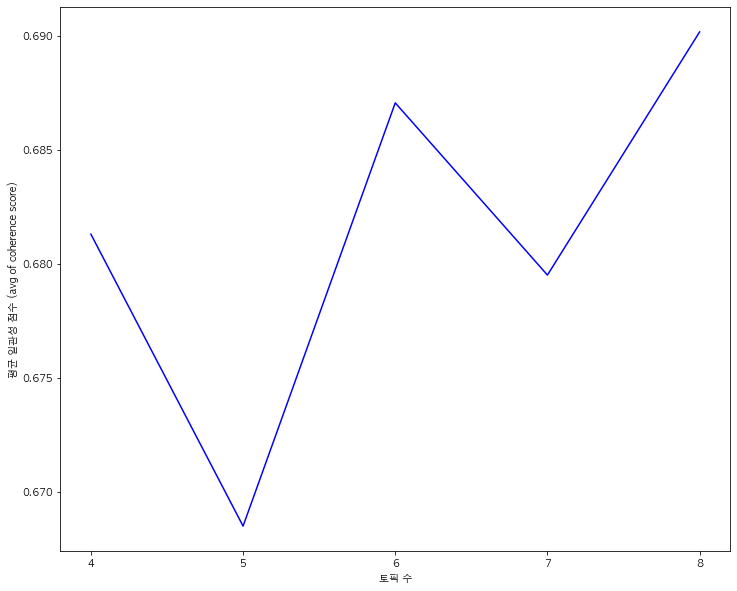

In [17]:
# 그래프 그리기
x = range(start, end, step)

plt.figure(figsize=(12, 10)) 
plt.plot(x, np_cs_avg_list, '-b')
plt.xlabel("토픽 수")
plt.ylabel("평균 일관성 점수 (avg of coherence score)")
plt.xticks(x)
plt.show()

##### 위에서 구한 일관성 점수 기준으로 최적 토픽 모델 결정

In [24]:
# 최적 토픽 모델을 dtm_model로 할당
dtm_model = model_list[np.argmax(np_cs_avg_list)]
len(dtm_model.print_topics())

8

##### DTM 결과 보기

In [25]:
# 고정된 시간 내에서 전체 토픽보기
pprint(dtm_model.print_topics(time=1, top_terms=20))

[[('프로도', 0.037164509009551025),
  ('일단', 0.026059913541270664),
  ('다', 0.021688299187068376),
  ('프로도이', 0.01643045574294197),
  ('왜', 0.012980272854879533),
  ('후발', 0.012297929866202676),
  ('굿굿', 0.011221178696941963),
  ('아직', 0.008613485109220921),
  ('그래도', 0.008013581126463927),
  ('오늘은', 0.007835026763143384),
  ('다들', 0.007529385734068018),
  ('바로', 0.006995230248881405),
  ('가서', 0.006407115134352411),
  ('호우', 0.004596199173038919),
  ('이건', 0.00434229867760054),
  ('지노', 0.004070410234240054),
  ('밥', 0.003846079782575228),
  ('사람', 0.00352032352764707),
  ('혼자', 0.0034516111061520774),
  ('무지', 0.002994123433138435)],
 [('라이언', 0.026917477542742905),
  ('역시', 0.017879486028852472),
  ('뭐', 0.017302123857646883),
  ('너무', 0.013090695875497917),
  ('임마', 0.012532893166174765),
  ('아니', 0.01107559775447458),
  ('좋음', 0.010429072663693991),
  ('그거', 0.01001506840783984),
  ('그건', 0.009463809037218579),
  ('우리', 0.009355687018617864),
  ('됨', 0.007379052631398467),
  ('아하', 0

In [26]:
# 고정된 토픽 내에서 전체 시간 변화 보기
dtm_model.print_topic_times(topic=0, top_terms=20)

[[('프로도', 0.036788729266910035),
  ('일단', 0.025941884887237532),
  ('다', 0.023862734064834277),
  ('프로도이', 0.016293553423478487),
  ('왜', 0.01295836550473738),
  ('후발', 0.012365029372091984),
  ('굿굿', 0.011117353002152455),
  ('아직', 0.0085449423592081),
  ('그래도', 0.007945961375775497),
  ('오늘은', 0.007630807610359413),
  ('다들', 0.007284881806823021),
  ('바로', 0.00692720673906451),
  ('가서', 0.006078311290500744),
  ('호우', 0.00460860711510686),
  ('이건', 0.004340542352515847),
  ('지노', 0.0041076954153293445),
  ('밥', 0.003838177503319252),
  ('사람', 0.003494557188998818),
  ('혼자', 0.0034388899879177755),
  ('무지', 0.0030445485427200835)],
 [('프로도', 0.037164509009551025),
  ('일단', 0.026059913541270664),
  ('다', 0.021688299187068376),
  ('프로도이', 0.01643045574294197),
  ('왜', 0.012980272854879533),
  ('후발', 0.012297929866202676),
  ('굿굿', 0.011221178696941963),
  ('아직', 0.008613485109220921),
  ('그래도', 0.008013581126463927),
  ('오늘은', 0.007835026763143384),
  ('다들', 0.007529385734068018),
  ('바

### 6. 문서별 토픽 비중 구하기

> 1) 토픽 비중 계산을 위한 데이터 전처리

> 2) OOM 문제 해결을 위한 샘플링

> 3) DataFrame으로 만들어 excel 파일로 저장

In [27]:
doc_time = []

for doc_id in range(len(tokenized_data)):
    if doc_id < time_slice[0]:
        doc_time.append(0)
    elif doc_id < time_slice[0] + time_slice[1]:
        doc_time.append(1)
    else:
        doc_time.append(2)
        
print(len(doc_time))

162861


In [28]:
# time_slot 별로 1000개씩만 뽑기.
sample_idx1 = np.random.randint(0, time_slice[0], size=1000)
sample_idx2 = np.random.randint(time_slice[0], time_slice[0] + time_slice[1], size=1000)
sample_idx3 = np.random.randint(time_slice[0] + time_slice[1], time_slice[0] + time_slice[1] + time_slice[2],
                                size=1000)

print(sample_idx1[:10])
print(sample_idx2[:10])
print(sample_idx3[-10:])

[65644 74573 67902 75018 46121  1579 12589  7516 49985 66445]
[123034 136945 104505 145249 135067  95867 134459 132279  98973 126646]
[162077 160469 162600 150947 160759 145895 161711 157455 152093 150248]


In [29]:
# OOM(Out-of-Memory) 문제로 인해 1000개씩 샘플링 하여 실행.

processing_docs = []
processing_time = []

sample_indices = np.concatenate((sample_idx1, sample_idx2, sample_idx3))

for idx in sample_indices:
    processing_docs.append(tokenized_data[idx])
    processing_time.append(doc_time[idx])
    
print(len(processing_docs))
print(len(processing_time))

3000
3000


In [30]:
doc_dist = []

for doc_id in sample_indices:
    doc_dist.append(dtm_model.doc_topics(doc_id)) # dtm_model.doc_topics는 문서별 토픽 확률을 return해주는 명령어 

In [31]:
doc_dist = np.array(doc_dist)
doc_topic_dist = doc_dist.T
doc_topic_dist.shape

(8, 3000)

In [32]:
NUM_TOPICS = dtm_model.num_topics

for i in range(NUM_TOPICS):
    print("%f" % doc_dist[0][i], end=", ")

print()

for i in range(NUM_TOPICS):
    print("%f" % doc_topic_dist[i][0], end=", ")

0.009259, 0.009259, 0.009259, 0.009259, 0.009259, 0.935185, 0.009259, 0.009259, 
0.009259, 0.009259, 0.009259, 0.009259, 0.009259, 0.935185, 0.009259, 0.009259, 

In [33]:
doc_topic_dist[0].shape

(3000,)

In [34]:
dtm_df = pd.DataFrame({"Time" : processing_time, "Topic0" : doc_topic_dist[0], "Topic1" : doc_topic_dist[1],
                      "Topic2" : doc_topic_dist[2], "Topic3" : doc_topic_dist[3], "Topic4" : doc_topic_dist[4],
                       "Topic5" : doc_topic_dist[5], "Topic6" : doc_topic_dist[6], "Topic7" : doc_topic_dist[7]
                      })

print(dtm_df.head())
dtm_df.to_excel("kakao_dtm_8topic_dist.xlsx")

   Time    Topic0    Topic1    Topic2    Topic3    Topic4    Topic5    Topic6  \
0     0  0.009259  0.009259  0.009259  0.009259  0.009259  0.935185  0.009259   
1     0  0.009259  0.009259  0.009259  0.009259  0.009259  0.009259  0.009259   
2     0  0.004808  0.481191  0.004808  0.004808  0.004808  0.489963  0.004808   
3     0  0.009259  0.009259  0.009259  0.009259  0.009259  0.009259  0.009259   
4     0  0.626449  0.003247  0.003247  0.003247  0.003247  0.354071  0.003247   

     Topic7  
0  0.009259  
1  0.935185  
2  0.004808  
3  0.935185  
4  0.003247  


### 7. 시간별 토픽비중 변화 추이

> 1) 토픽 비중 변화를 보기 위한 데이터 전처리

> 2) 시간대별 토픽 비중 평균 계산

##### timeslot별로 평균 구하기

In [35]:
# groupby 오브젝트 생성하기
doctopic_timeslot = dtm_df.groupby('Time')
doctopic_timeslot.groups

{0: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
            dtype='int64', length=1000),
 1: Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
             ...
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
            dtype='int64', length=1000),
 2: Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
             ...
             2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
            dtype='int64', length=1000)}

In [36]:
# mean() 함수 이용해서 Topic0~TopicN까지의 모든 열 평균 구하기
timeslot_avg = doctopic_timeslot.mean()
timeslot_avg = timeslot_avg.reset_index()   # index 리셋하기
timeslot_avg

,Time,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7
0,0,0.102757,0.097722,0.103947,0.091722,0.083765,0.120630,0.099774,0.299683
1,1,0.123723,0.112327,0.131969,0.118976,0.115903,0.128357,0.134807,0.133938
2,2,0.126631,0.129331,0.117364,0.124818,0.118410,0.123398,0.133078,0.126971


In [37]:
# 시기별 모든 토픽 값들의 합은 1이다.
timeslot_avg.sum(axis=1)

0    1.0
1    2.0
2    3.0
dtype: float64

### 8. 6번, 7번 결과로 그래프 그리기

#### 시간별 토픽 비중변화 추이

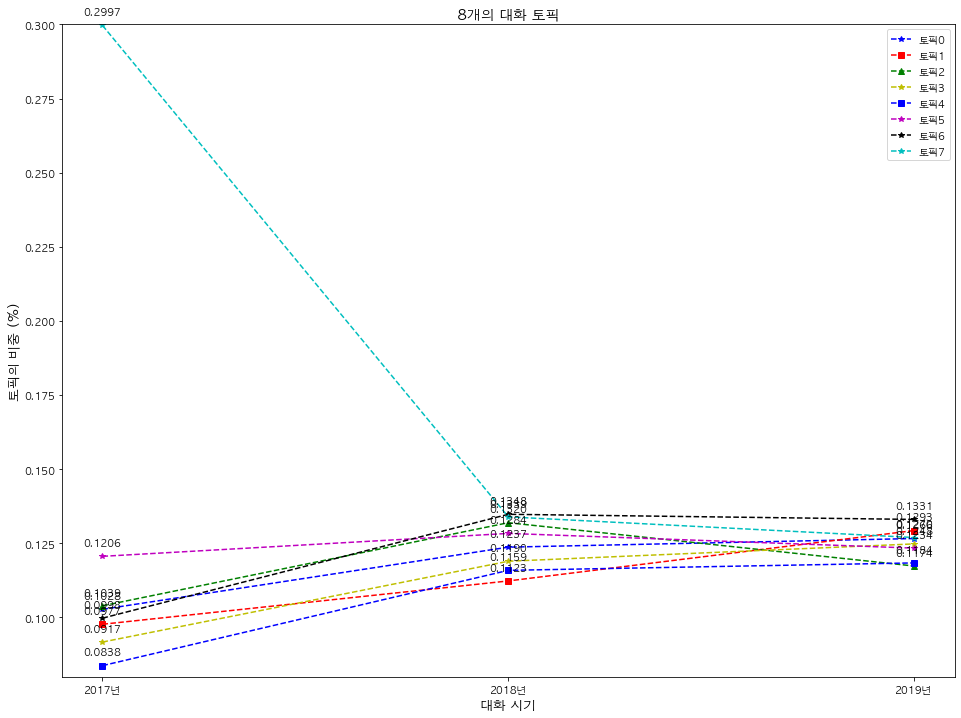

In [49]:
# figure 하나당 4개씩 그래프 그리기

plt.figure(figsize=(16, 12)) 
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic0'], 'b*--', label='토픽0')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic1'], 'rs--', label='토픽1')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic2'], 'g^--', label='토픽2')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic3'], 'y*--', label='토픽3')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic4'], 'bs--', label='토픽4')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic5'], 'm*--', label='토픽5')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic6'], 'k*--', label='토픽6')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'c*--', label='토픽7')
#그래프에서 값 표시하는 annotate 방법 찾기
for topic_id in ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7']:
    for x, y in zip(range(len(time_slice)), timeslot_avg[topic_id]):
        plt.annotate("%.4f"%y, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("8개의 대화 토픽", fontsize=14)
plt.xlabel("대화 시기", fontsize=13)
plt.ylabel("토픽의 비중 (%)", fontsize=13)
plt.xticks(timeslot_avg['Time'], ['2017년', '2018년', '2019년'])
plt.ylim([0.08, 0.30])
plt.legend(loc="best")
plt.savefig("kakao_topic_distribution_graph.png")
plt.show()

#### 시간별 단어의 토픽 비중변화 추이

In [39]:
from collections import defaultdict
# 단어의 확률 변화를 보고 싶은 topic 번호 
topic_id = 7
# 해당 토픽에서 포함할 단어목록 결정
topic_info = dtm_model.print_topic_times(topic=topic_id, top_terms=50)
topic_dict = defaultdict(list)

#time별 특정 topic(topic_id)의 단어별 확률값.
for dist_inTime in topic_info:
    #time별로 단어와 확률값 저장.
    for word, prob in dist_inTime:
        topic_dict[word].append(prob)

In [40]:
print(topic_dict)

defaultdict(<class 'list'>, {'나도': [0.013128757918921563, 0.013269167843138746, 0.013410124531041984], '넌': [0.008079250822533445, 0.00854858221656759, 0.008305336161136902], '내': [0.007904880233940864, 0.007992738211390663, 0.007943543268522778], '와': [0.006021623501617982, 0.006045677157690481, 0.006076210489243927], '잘': [0.005656109369979835, 0.00572319068998686, 0.005788858218609051], '어제': [0.005379673983702613, 0.005560585159162013, 0.005373966425637939], '야': [0.0046389298126938705, 0.005090928806726937, 0.0050644799397589636], '없음': [0.0040436967841550025, 0.004046945325866027, 0.003945764187081444], '뭐야': [0.003748480921917901, 0.0037577226859708056, 0.003770424626147188], '아니면': [0.0033052274078332333, 0.0033510910679935947, 0.0033913938369314867], '나중에': [0.0030133175307908277, 0.0029642953211829045, 0.0030498943918804986], '가즈아': [0.0027748084449684654, 0.002839450333357729, 0.002879909500291202], '리얼': [0.002617811003042177, 0.0025992812509781655, 0.0025896045906461033], 

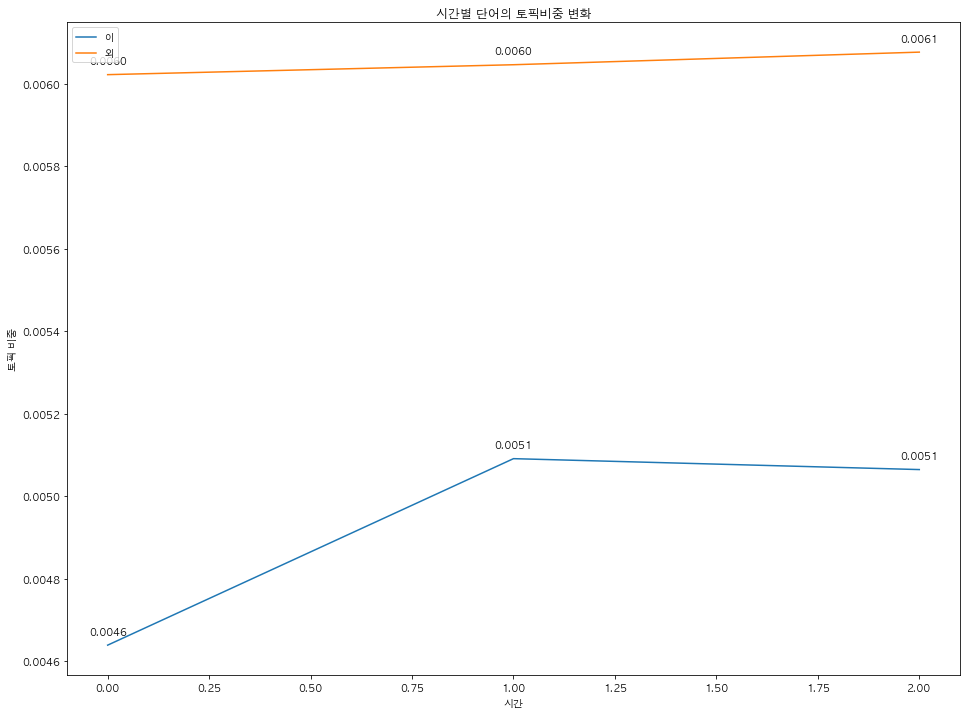

In [43]:
#확률값 추이를 보고싶은 단어 목록
keywords = ["야", "와"]

# time_slot
t = [i for i in range(len(time_slice))]

plt.figure(figsize=(16, 12))
for keyword in keywords:
    plt.plot(t, topic_dict[keyword], label=keyword)
    
    for x, y in zip(t, topic_dict[keyword]):
         plt.annotate("%.4f"%y, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("시간별 단어의 토픽비중 변화")
plt.xlabel("시간")
plt.ylabel("토픽 비중")
plt.legend(loc='best')
plt.savefig("kakao_keywords_distribution_overtime_graph.png")
plt.show()